# Analyzing amazon Sales data
Akash Patil

aakashgolu1008@gmail.com

# Problem Statement:
Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.</br>
Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings.


## Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df=pd.read_csv('data\Amazon Sales data.csv')

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
# Missing values 
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

No missing values in the Dataset

In [6]:
# Check the duplicated Values
df.duplicated().sum()

0

In [7]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


## Observations
- in this dataset 100 rows and 14 columns .
- No null values in this dataset.
- in this dataset 5 float columns , 2 int columns and 7 object columns.
- we need to convert the Order date and ship date into datetime data type.

In [8]:
# convert the Order date and Ship date features to the date time data type/
df['Order Date']=df['Order Date'].astype("datetime64[ns]")
df['Ship Date']=df['Ship Date'].astype("datetime64[ns]")

In [9]:
# Number of unique values in each columns
df.nunique()


Region              7
Country            76
Item Type          12
Sales Channel       2
Order Priority      4
Order Date        100
Order ID          100
Ship Date          99
Units Sold         99
Unit Price         12
Unit Cost          12
Total Revenue     100
Total Cost        100
Total Profit      100
dtype: int64

Check statistics of data set

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Region,100,7,Sub-Saharan Africa,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,100,76,The Gambia,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Type,100,12,Clothes,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Channel,100,2,Offline,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Priority,100,4,H,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,100,NaN,NaN,NaN,2013-09-16 14:09:36,2010-02-02 00:00:00,2012-02-14 12:00:00,2013-07-12 12:00:00,2015-04-07 00:00:00,2017-05-22 00:00:00,NaN
Order ID,100.0,NaN,NaN,NaN,555020412.36,114606559.0,338922488.0,557708561.0,790755080.75,994022214.0,260615257.131426
Ship Date,100,NaN,NaN,NaN,2013-10-09 22:48:00,2010-02-25 00:00:00,2012-02-24 18:00:00,2013-08-11 12:00:00,2015-04-28 00:00:00,2017-06-17 00:00:00,NaN
Units Sold,100.0,NaN,NaN,NaN,5128.71,124.0,2836.25,5382.5,7369.0,9925.0,2794.484562
Unit Price,100.0,NaN,NaN,NaN,276.7613,9.33,81.73,179.88,437.2,668.27,235.592241


In [11]:
for i in df["Region"].unique():
    print("Countries from the Region - '{}'".format(i))
    countries=df[df["Region"]== i]["Country"].unique()
    length=len(countries)
    print(countries, "")
    print(f"Region {i} number of countries in {length} \n")

Countries from the Region - 'Australia and Oceania'
['Tuvalu' 'Solomon Islands' 'East Timor' 'New Zealand' 'Kiribati'
 'Australia' 'Fiji' 'Federated States of Micronesia' 'Samoa '] 
Region Australia and Oceania number of countries in 9 

Countries from the Region - 'Central America and the Caribbean'
['Grenada' 'Honduras' 'Costa Rica' 'Haiti' 'Belize' 'Nicaragua'] 
Region Central America and the Caribbean number of countries in 6 

Countries from the Region - 'Europe'
['Russia' 'Bulgaria' 'Norway' 'Portugal' 'Moldova ' 'France' 'Switzerland'
 'Slovakia' 'Iceland' 'Macedonia' 'Albania' 'Austria' 'United Kingdom'
 'San Marino' 'Lithuania' 'Monaco' 'Spain' 'Slovenia' 'Romania'] 
Region Europe number of countries in 19 

Countries from the Region - 'Sub-Saharan Africa'
['Sao Tome and Principe' 'Rwanda' 'Angola' 'Burkina Faso'
 'Republic of the Congo' 'Senegal' 'Cape Verde' 'Cameroon' 'Mali'
 'The Gambia' 'South Sudan' 'Djibouti' 'Niger' 'Comoros' 'Mauritania'
 'Lesotho' 'Sierra Leone' "Cot

## Observations -
- in the `Region` feature unique 7 values and 36 times Sub-Saharan Africa is occured.
    - number of ``countries`` in Region Sub-Saharan Africa are high in compare to other Regions.
- In the `Item Type` feature unique 12 values and most time occure cloths 13 times.
- In the `Sales Channel ` 50-50% of offline and online.
- in the `Order Priority` 4 unique values, most frequetly 30 times H is occured.
- In the `Units Sold` 124.0 minimum units solds and 9925 maximum units solds.
- In the `Unit Price` 9.33 minimum Unit Price and 668.27 maximum Unit Price.
- In the `Unit Cost` 6.92 minimum Unit Cost and 524.96 maximum Unit Cost.

we are checking the data from Total Cost, Total Profit and Total Revenue the dataset is correct or not

In [12]:
df[round(df["Units Sold"]*df["Unit Cost"],2) != df["Total Cost"]]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit


In [13]:
df[round(df["Units Sold"]*df["Unit Price"],2) != df["Total Revenue"]]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit


In [14]:
df[round(df["Total Revenue"]-df["Total Cost"],2) != df["Total Profit"]]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit


There is no calculation error

### Creating new features in the dataset

In [15]:
# Creating the new features from the Order date - day name,Order month, Order Year and Order Year month.
df["day"]=df['Order Date'].dt.day_name()
df["Order_month"]=df["Order Date"].dt.month
df["Order_Year"]=df["Order Date"].dt.year
df["Order_Year_month"]=df["Order Date"].dt.strftime('%Y-%m')

In [16]:
# Save the Csv file 
df.to_csv("Cleaned Amazon Sales Data.csv",index=False)

In [17]:
object_col=df.select_dtypes(include="object")
number_col=df.select_dtypes(include="number")

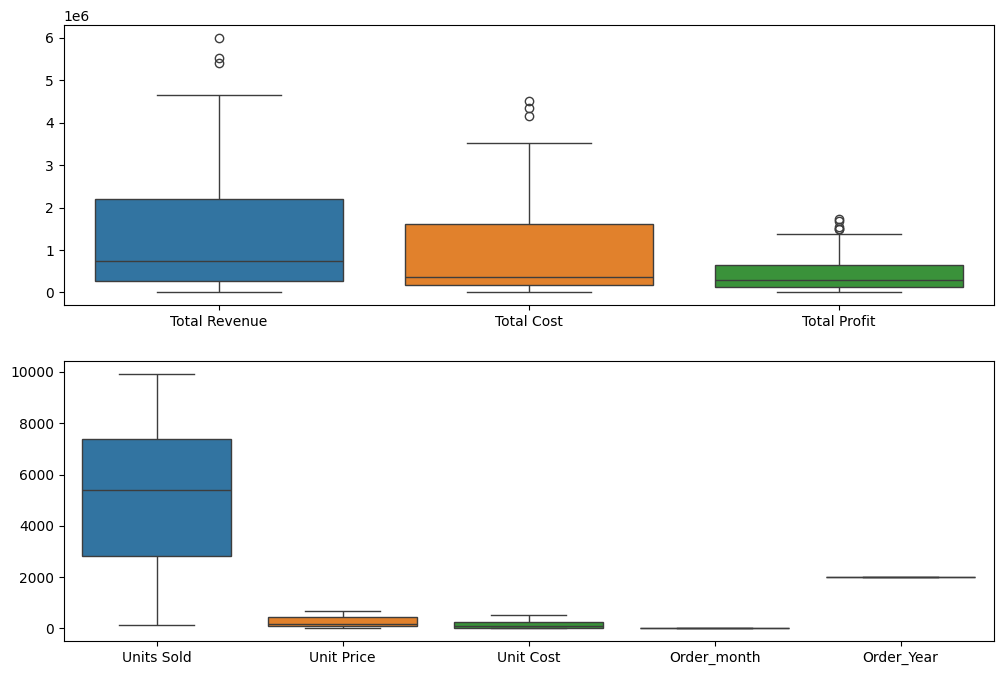

In [18]:
# checking the Outliers from the data
def outliers(df):
    col_1=[]
    col_2=[]
    for i in number_col.columns:
        if number_col[i].max() < 10000:
            col_1.append(i)
        else :
            col_2.append(i)

    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1)
    sns.boxplot(df[col_2].drop("Order ID",axis=1))
        
    plt.subplot(2,1,2)
    sns.boxplot(df[col_1])
    plt.show()
outliers(df)

here we see that some outliers shown in the Total Revenue, Total Cost, Total Profit.
but not see in the Unit Sold, Unit Price and Unit Cost.
<!-- we are not removing the outliers -->

In [19]:
# we are seeing the skewness of this columns 
for i in number_col:
    skew = df[i].skew()
    print(f"Skewness for {i} feature is - {skew}", ["feature skweed" if skew > 1 else "feature slightly skeewd" if 0 < skew < 1 else "negatively skweed"])


Skewness for Order ID feature is - -0.09835435228012147 ['negatively skweed']
Skewness for Units Sold feature is - -0.0999527123530475 ['negatively skweed']
Skewness for Unit Price feature is - 0.6207513574619163 ['feature slightly skeewd']
Skewness for Unit Cost feature is - 0.8580721284155021 ['feature slightly skeewd']
Skewness for Total Revenue feature is - 1.2776978228408213 ['feature skweed']
Skewness for Total Cost feature is - 1.4605118433178905 ['feature skweed']
Skewness for Total Profit feature is - 1.2385550378398305 ['feature skweed']
Skewness for Order_month feature is - 0.08744665321241744 ['feature slightly skeewd']
Skewness for Order_Year feature is - 0.22400443358079206 ['feature slightly skeewd']


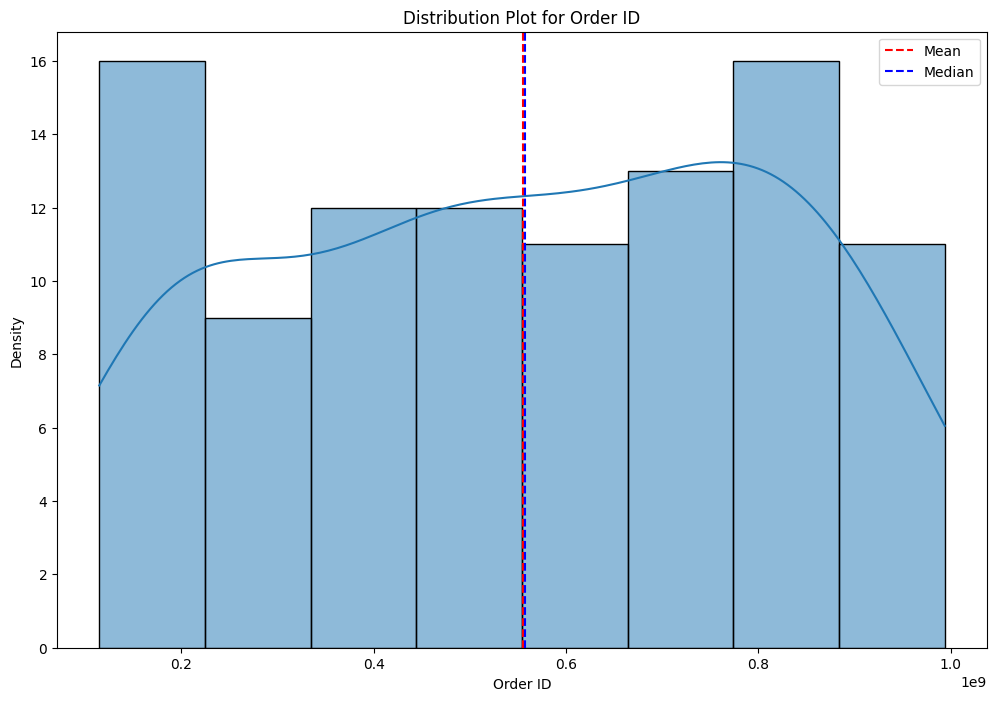

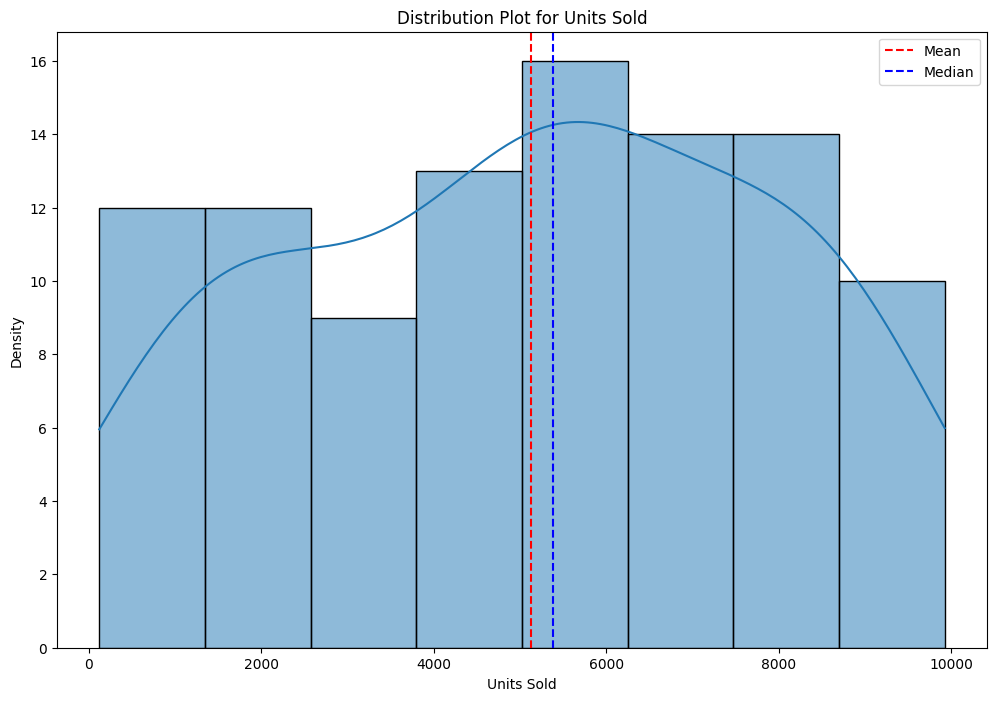

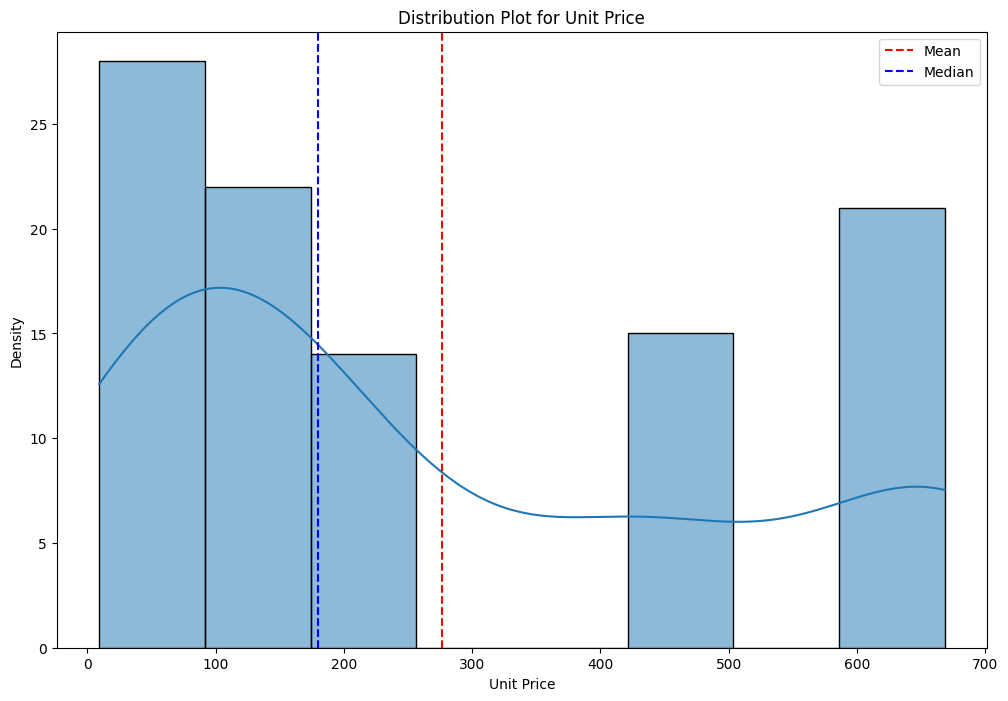

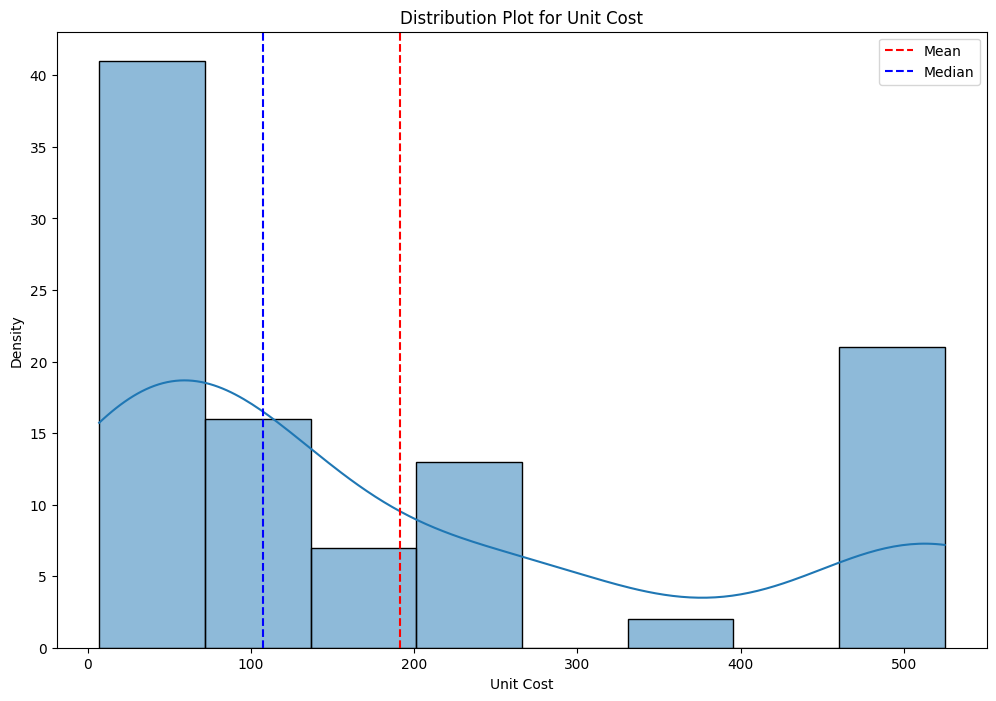

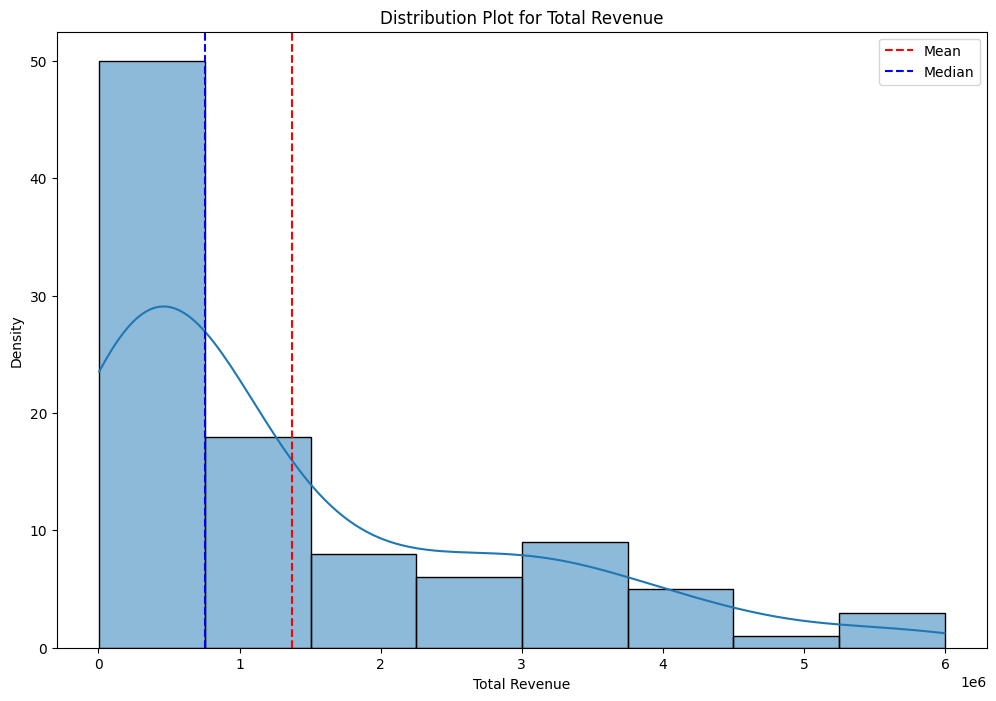

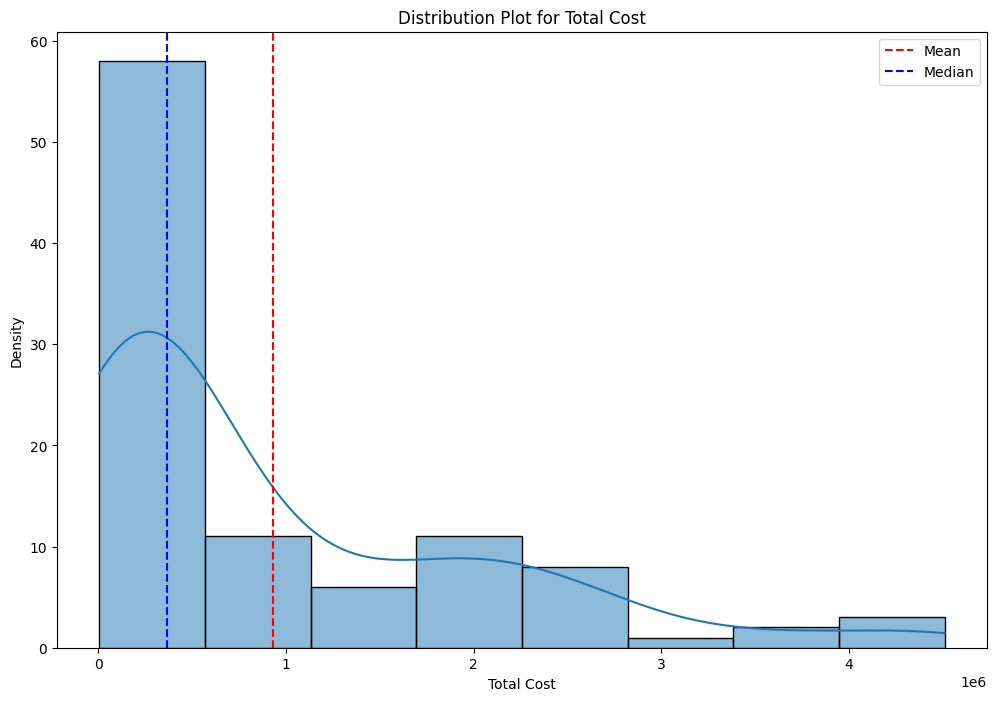

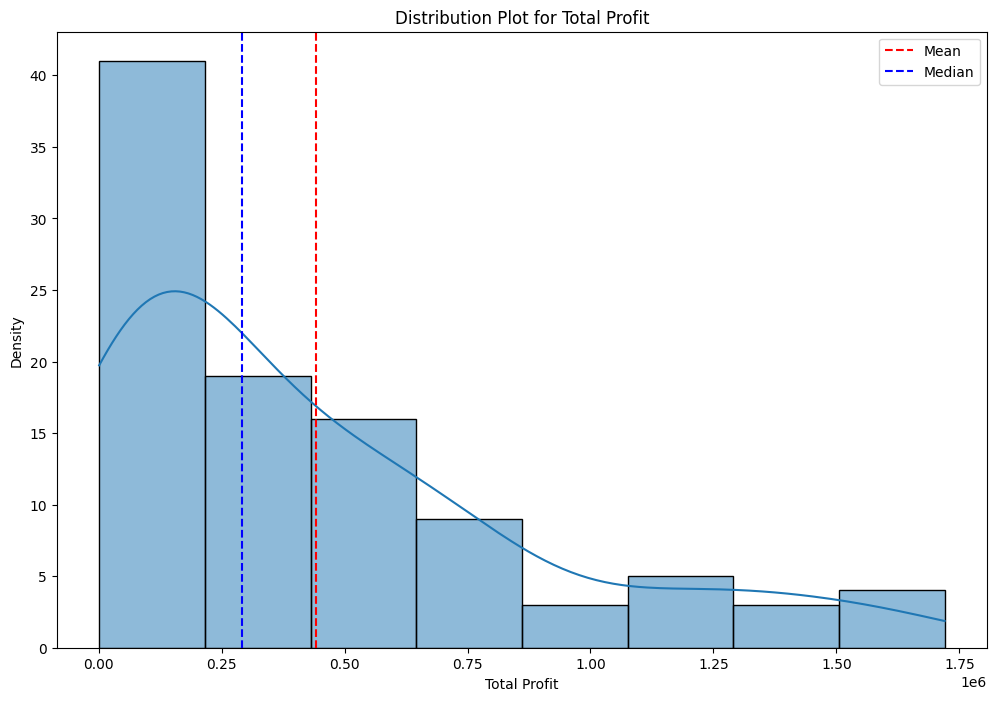

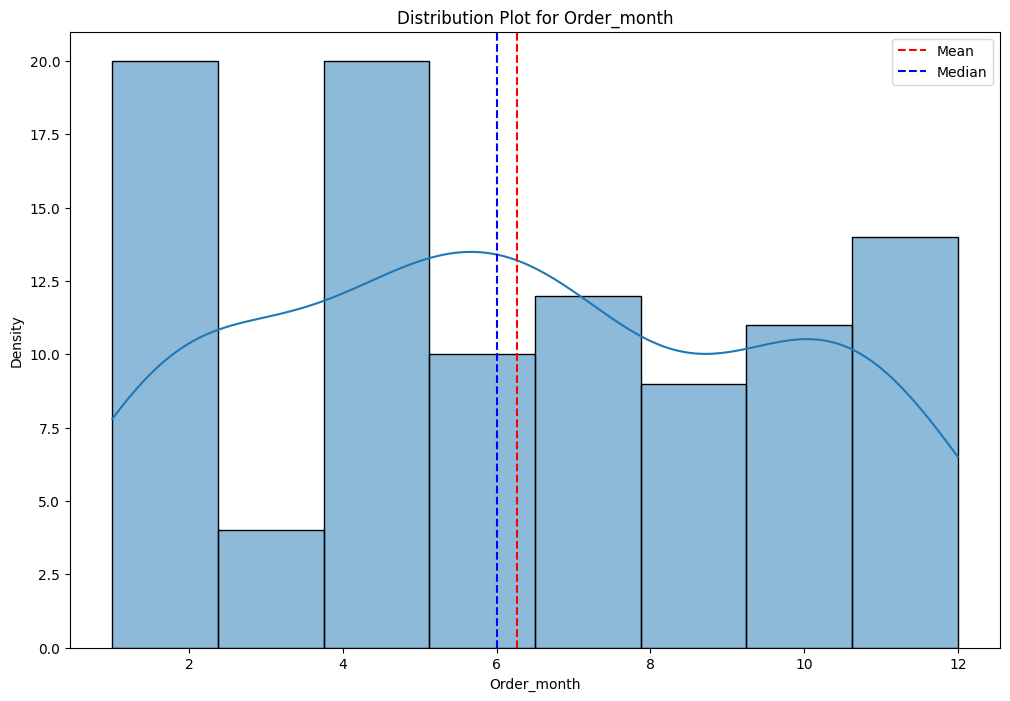

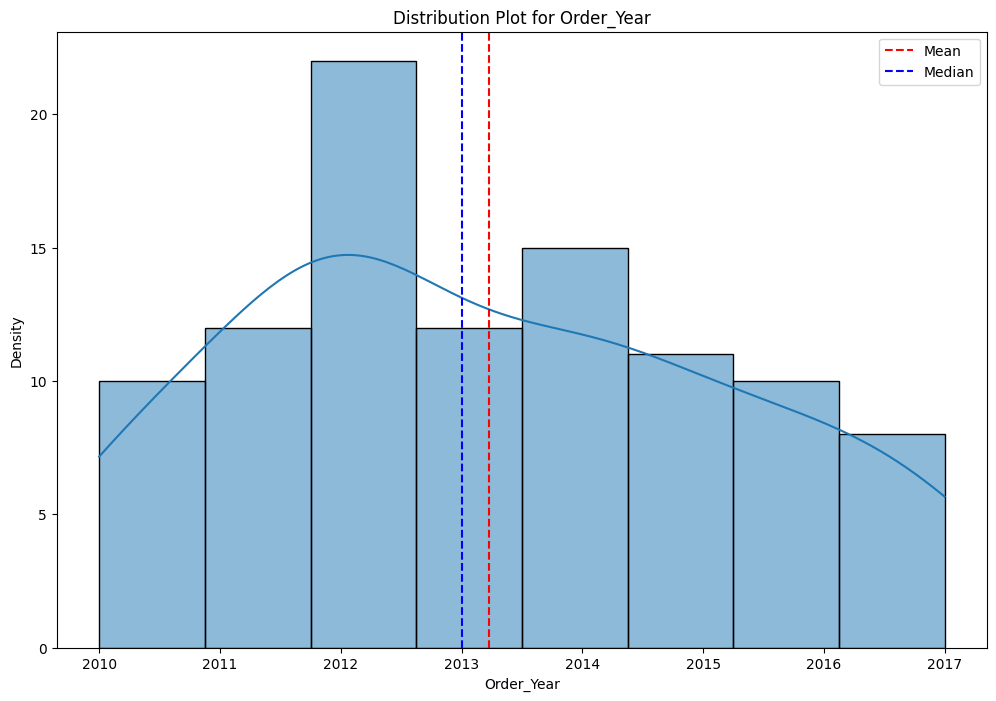

In [20]:
# see the distribution of each numerical column with mean and median
for i in number_col.columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(number_col[i],kde=True)
    plt.axvline(number_col[i].mean(), color="red", linestyle='--', label='Mean')
    plt.axvline(number_col[i].median(), color="blue", linestyle='--', label='Median')
    plt.title(f'Distribution Plot for {i}')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


### Insights -
- Mean of Unit solds is around `5000`.
- Unit Price and Unit Cost is mostly in Range 0 to 100.

In [21]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,day,Order_month,Order_Year,Order_Year_month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,Friday,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,Wednesday,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,Friday,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,Friday,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,Friday,2,2013,2013-02


In [22]:
# From here we are analysing the data by features one by one 
# First we are analysis the Features "Region"

##### Compare the Regions with unit sold and Total Profit

number of Units Sold Region
Asia                                  59967
Australia and Oceania                 68325
Central America and the Caribbean     35771
Europe                                98117
Middle East and North Africa          48678
North America                         19143
Sub-Saharan Africa                   182870
Name: Units Sold, dtype: int64

Sum of Total Profit Region
Asia                                  6113845.87
Australia and Oceania                 4722160.03
Central America and the Caribbean     2846907.85
Europe                               11082938.63
Middle East and North Africa          5761191.86
North America                         1457942.76
Sub-Saharan Africa                   12183211.40
Name: Total Profit, dtype: float64


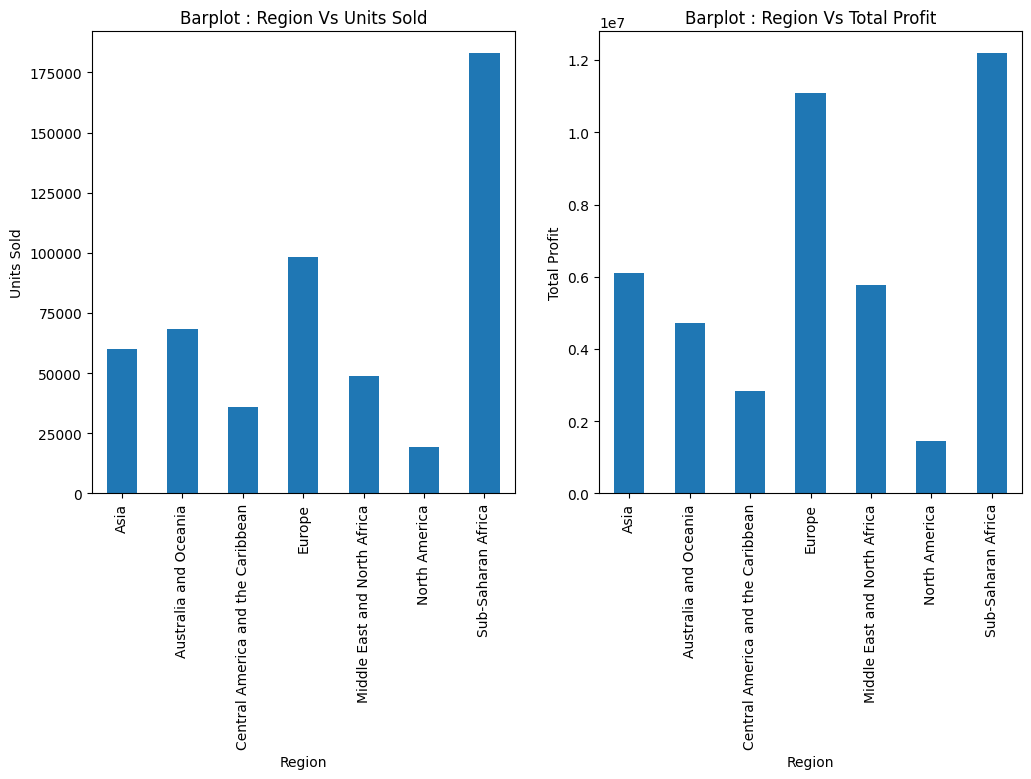

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
print("number of Units Sold",df.groupby("Region")["Units Sold"].sum())
df.groupby("Region")["Units Sold"].sum().plot(kind="bar")
plt.title("Barplot : Region Vs Units Sold")
plt.ylabel("Units Sold")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
print("\nSum of Total Profit",df.groupby("Region")["Total Profit"].sum())
df.groupby("Region")["Total Profit"].sum().plot(kind="bar")
plt.title("Barplot : Region Vs Total Profit")
plt.xticks(rotation=90)
plt.ylabel("Total Profit")
plt.show()

#### Insights
- In Australia, Oceania, Central America, the Caribbean, and North America, the total profit is less compared to other regions when considering the number of units sold.

##### Unit cost in all Region

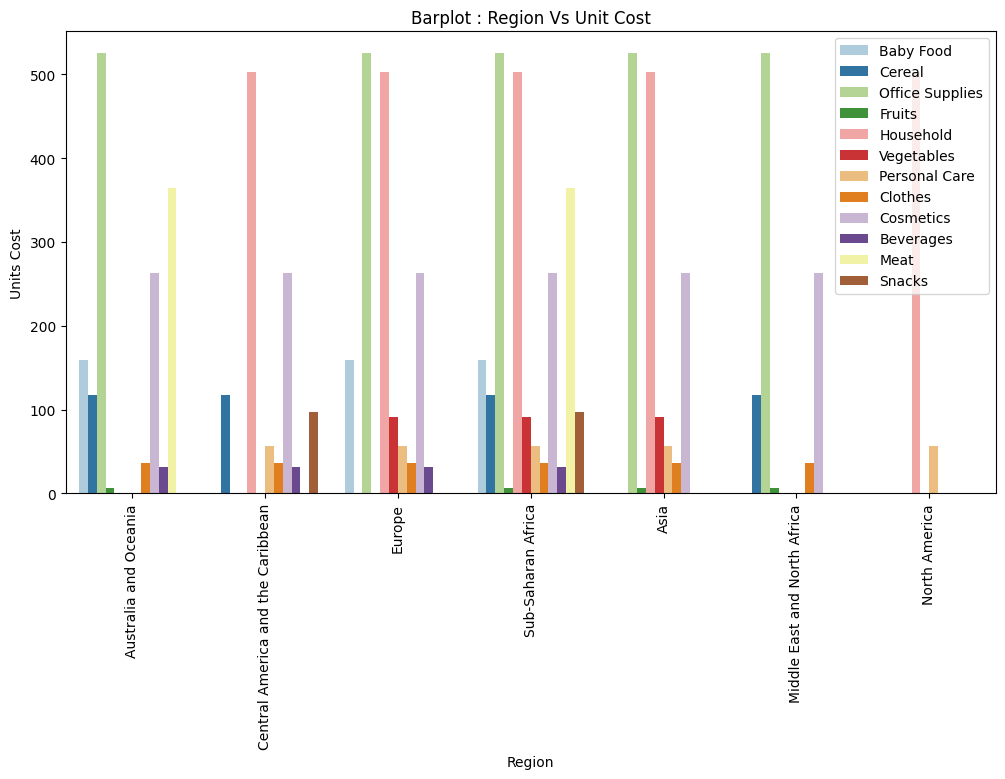

In [24]:
plt.figure(figsize=(12,6))
# df.groupby("Region")["Unit Cost"].mean().plot(kind="bar",hue="")
sns.barplot(data=df, x="Region",y="Unit Cost",hue="Item Type",palette="Paired")
plt.title("Barplot : Region Vs Unit Cost")
plt.ylabel("Units Cost")
plt.xticks(rotation=90)
plt.legend()
plt.show()

##### Insights 
- in all Region Unit cost is same.

##### The total number of units sold in each region categorized by order priority

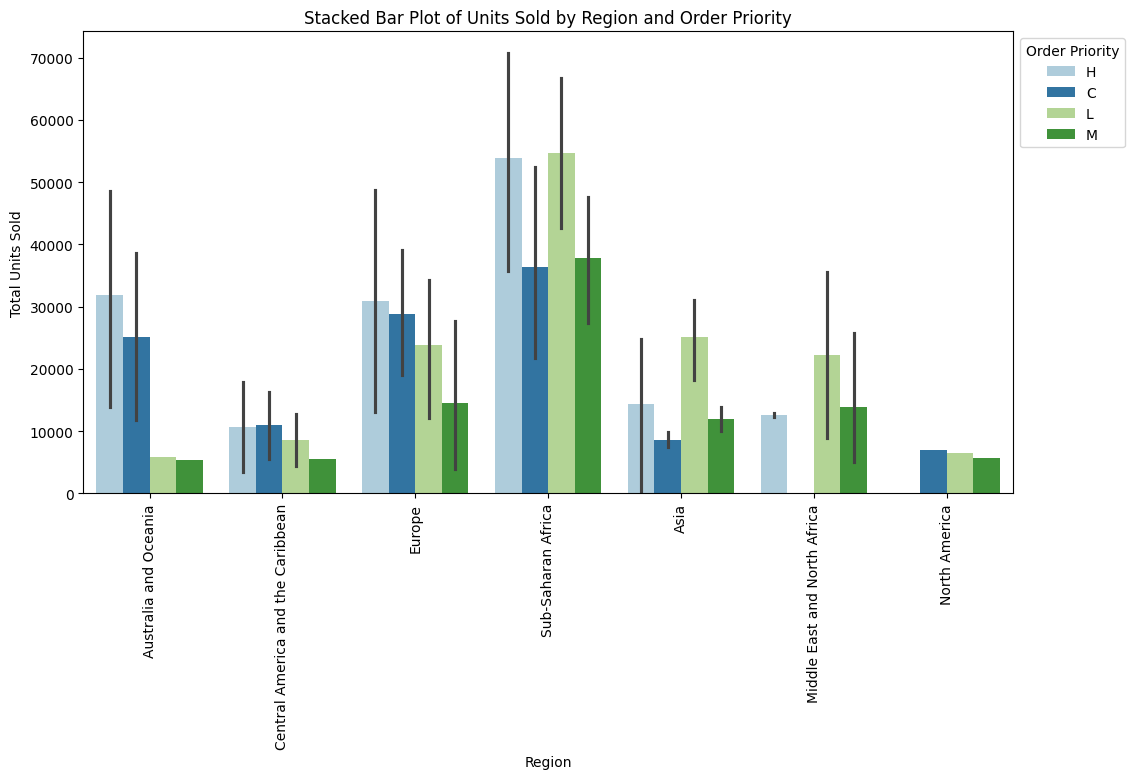

In [25]:
plt.figure(figsize=(12, 6))  
sns.barplot(data=df, x="Region", y="Units Sold", estimator=sum, hue="Order Priority",palette="Paired")
plt.title("Stacked Bar Plot of Units Sold by Region and Order Priority")
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)  
plt.legend(title="Order Priority", bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()

##### Insights
- In the Australia region, the predominant order priorities are H (High) and C. Conversely, in the Europe region, order priorities are similar to Australia's, with the addition of L (Low) and M (Medium), which also exhibit high numbers compared to the Australia region.
- Conversely, in the Asia and Middle East regions, the prevailing order priority is low.

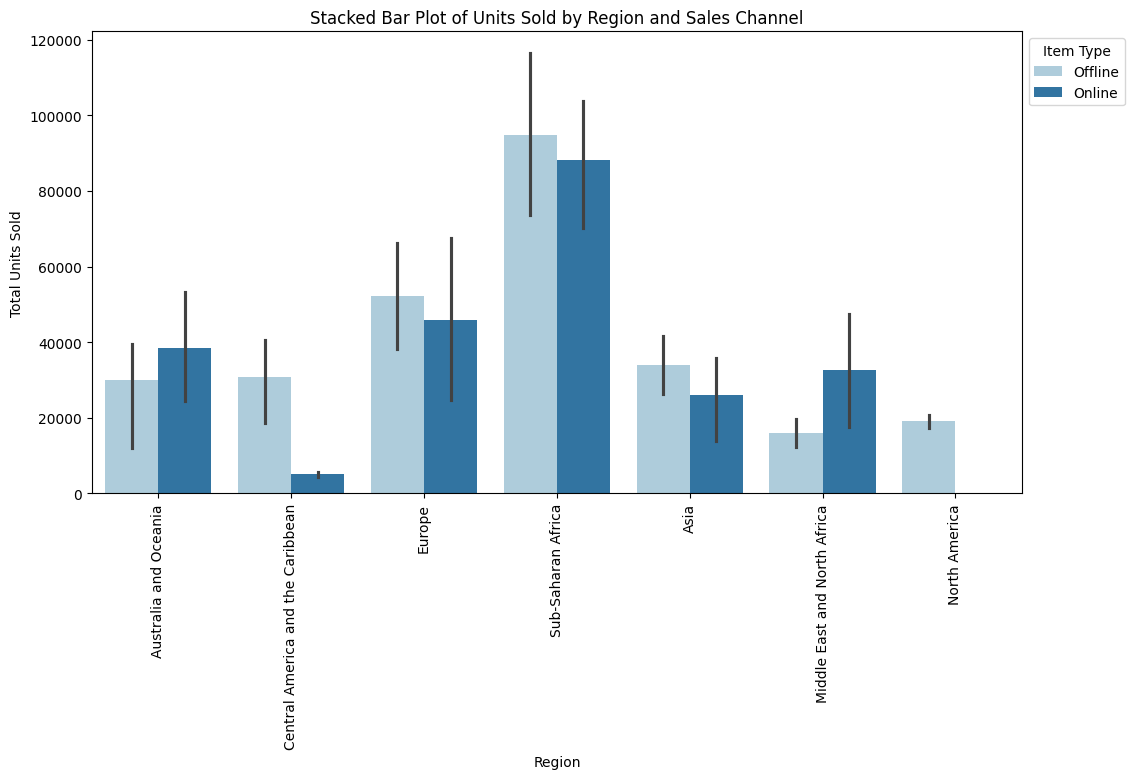

In [26]:
plt.figure(figsize=(12, 6))  
sns.barplot(data=df, x="Region", y="Units Sold", estimator=sum, hue="Sales Channel",palette="Paired")
plt.title("Stacked Bar Plot of Units Sold by Region and Sales Channel")
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)  
plt.legend(title="Item Type", bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()

##### Regional Analysis: High Unit Sales by Day

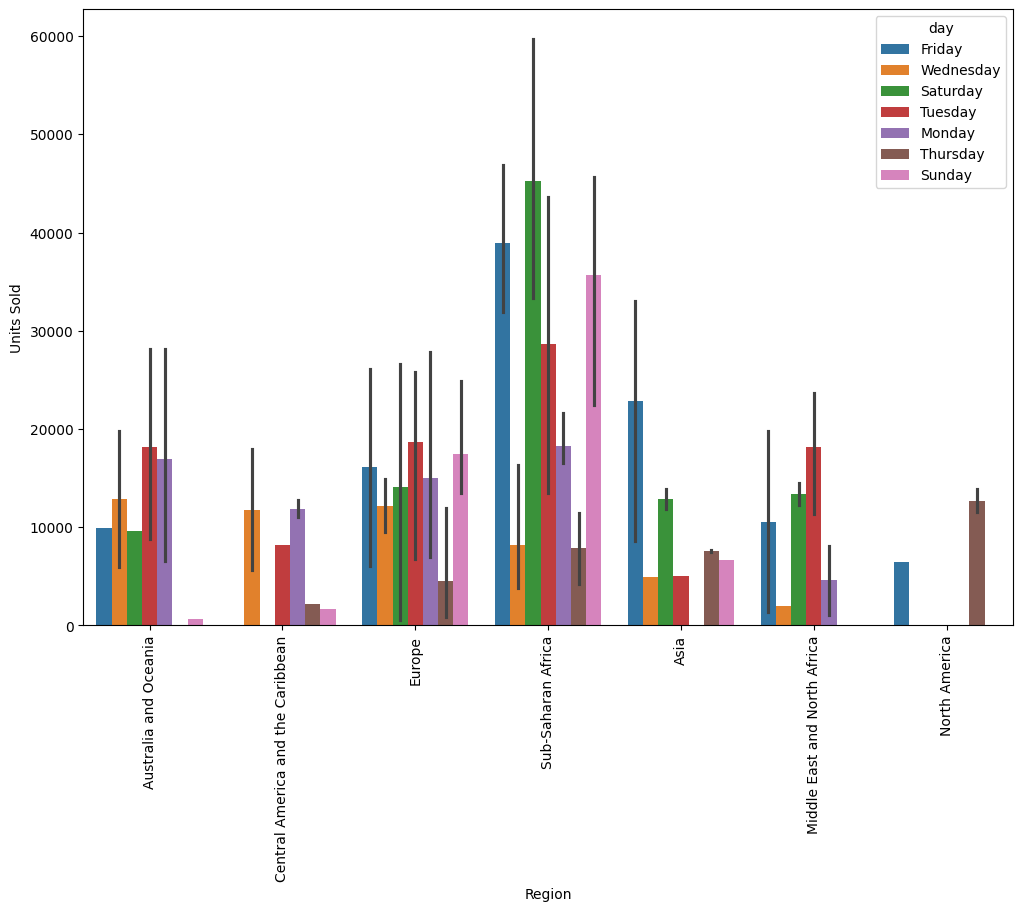

In [27]:
plt.figure(figsize=(12, 8))  
sns.barplot(data=df,y="Units Sold",x="Region",hue="day",estimator=sum)
plt.xticks(rotation=90)  
plt.show()

##### Insights
- In the Australia region, high priority unit sales are observed on Mondays and Tuesdays.
- In the Sub-Saharan Africa region, high priority unit sales occur on Fridays, Saturdays, and Sundays.
- In the Asia region, high priority unit sales are prominent on Fridays.
- The Middle East, North Africa, and Europe regions high priority unit sales on Tuesdays.

##### Yearly Analysis of Unit Sales Across Regions

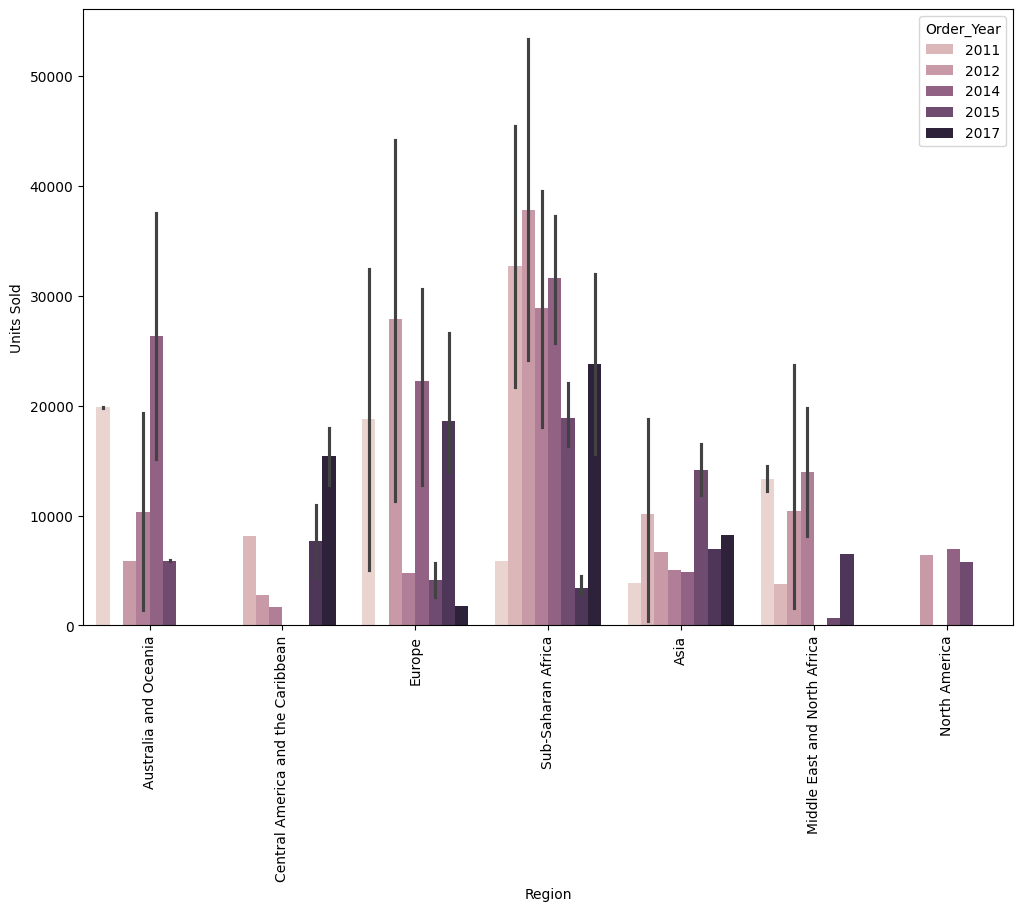

In [28]:
plt.figure(figsize=(12, 8))  
sns.barplot(data=df,y="Units Sold",x="Region",hue="Order_Year",estimator=sum)
plt.xticks(rotation=90)  
plt.show()

##### Regional Analysis - Unit Sold by Item type

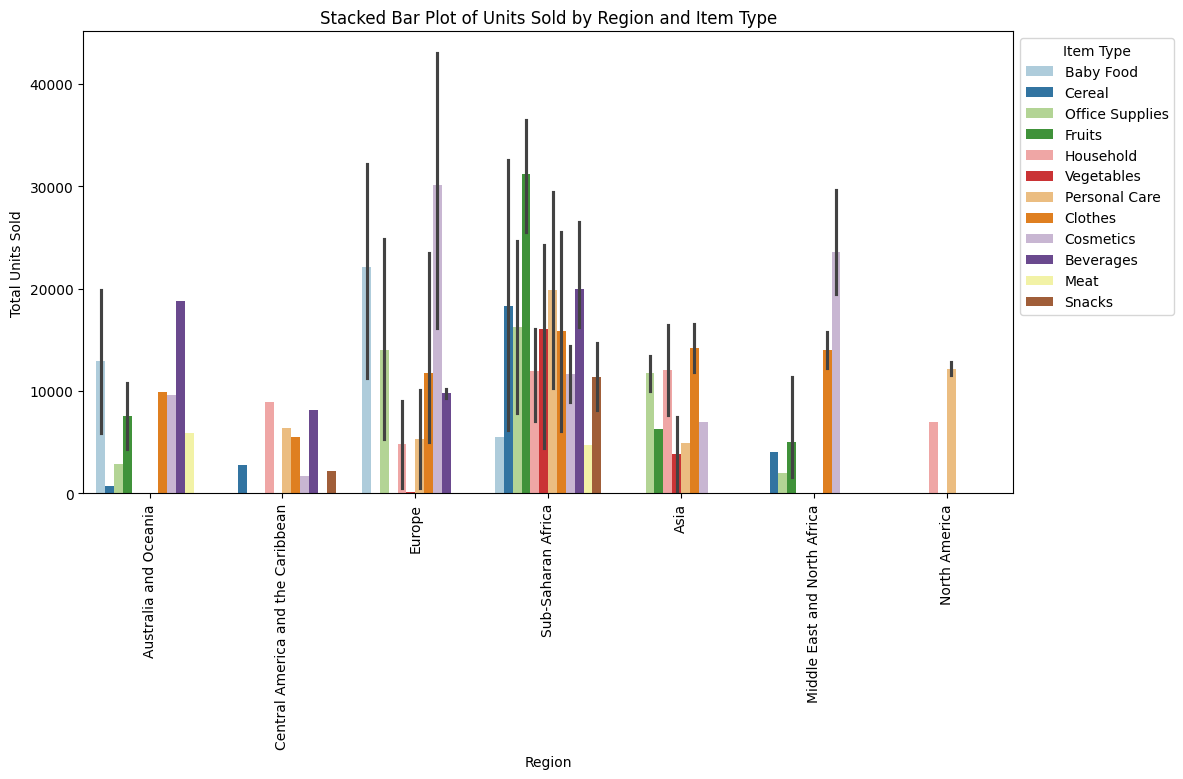

In [29]:
plt.figure(figsize=(12, 6))  
sns.barplot(data=df, x="Region", y="Units Sold", estimator=sum, hue="Item Type", palette="Paired")
plt.title("Stacked Bar Plot of Units Sold by Region and Item Type")
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)  
plt.legend(title="Item Type", bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()


##### Insights
- Cosmatics are highly sold in Europe and Middle East and North Africa.
- Beverages are highly sold in Aus , sub Saharan Africa and some in Europe .
- Baby foods sold in AUS, Europe and sub Saharan Africa.

##### Country Count plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


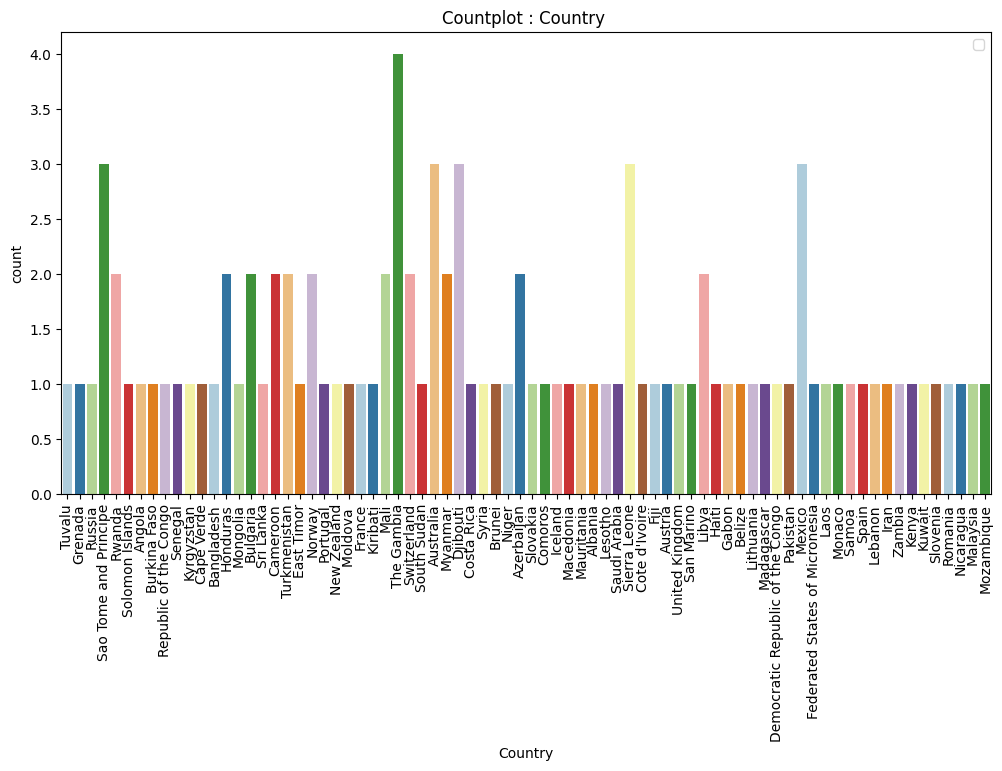

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="Country",palette="Paired")
plt.title("Countplot : Country ")

plt.xticks(rotation=90)
plt.legend()
plt.show()

##### Insights
- Countries number of times Occure -  The Gambia: 4 - maxico, sierra leone,Aus, etc: 3

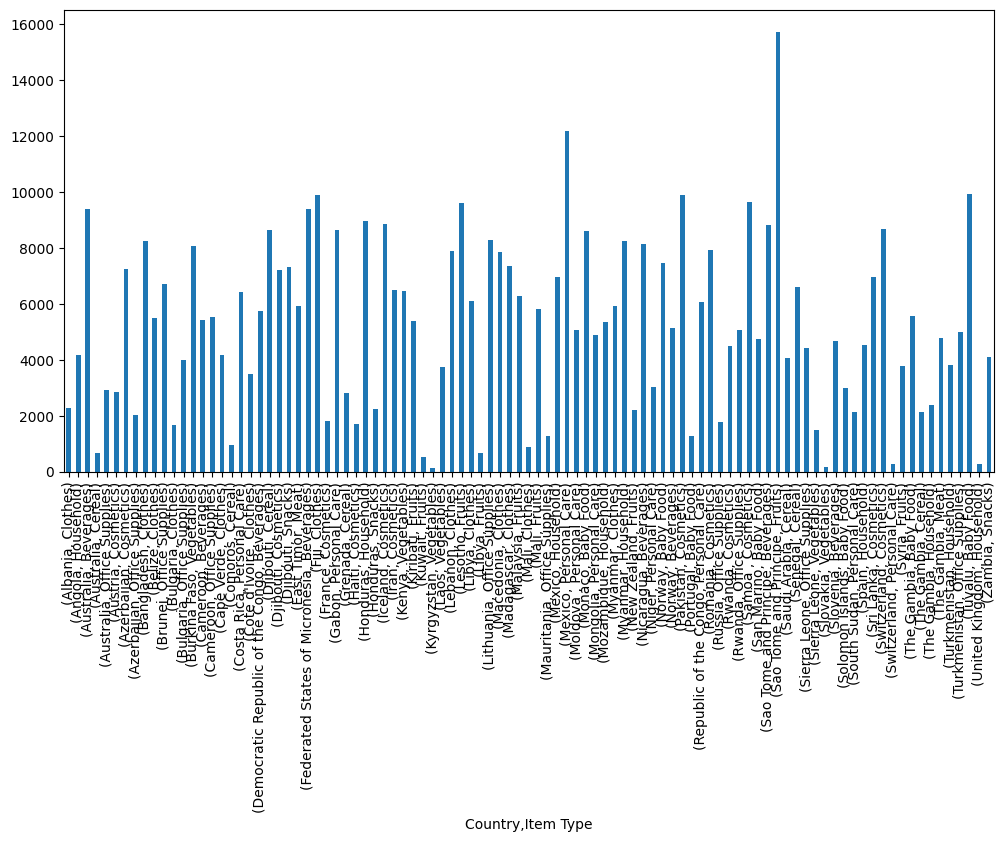

In [31]:
plt.figure(figsize=(12,6))
df.groupby(["Country","Item Type"])["Units Sold"].sum().plot(kind="bar")
plt.show()

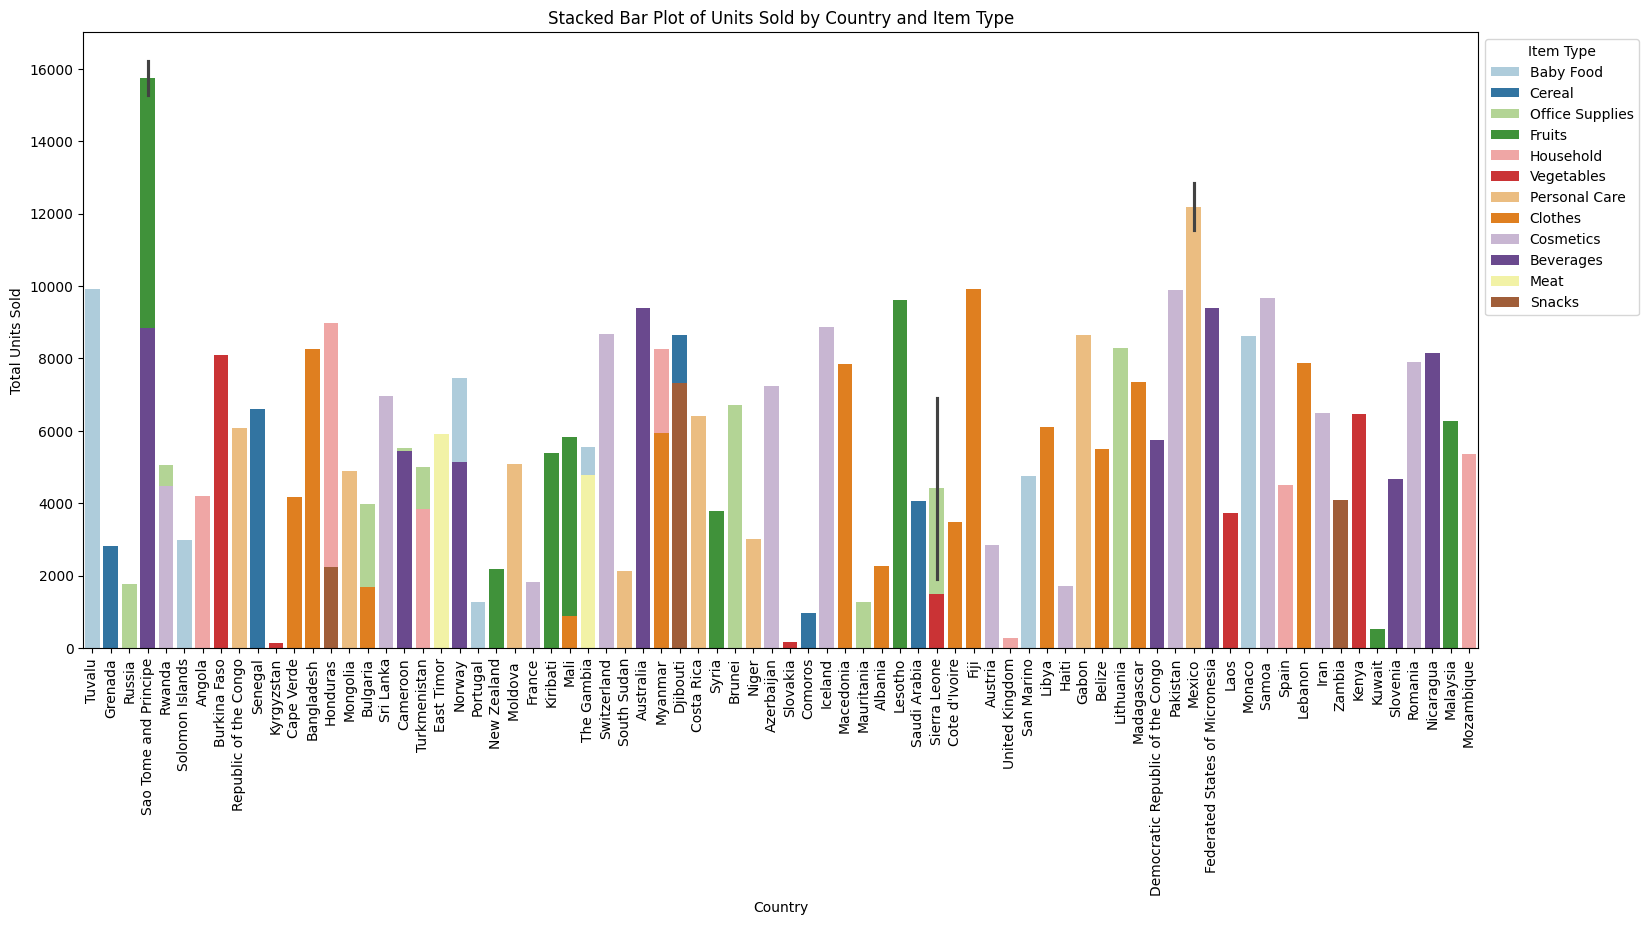

In [32]:
plt.figure(figsize=(18, 8))  
sns.barplot(data=df, x="Country", y="Units Sold", estimator=sum, hue="Item Type", dodge=False,palette="Paired")
plt.title("Stacked Bar Plot of Units Sold by Country and Item Type")
plt.xlabel("Country")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)  
plt.legend(title="Item Type", bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()


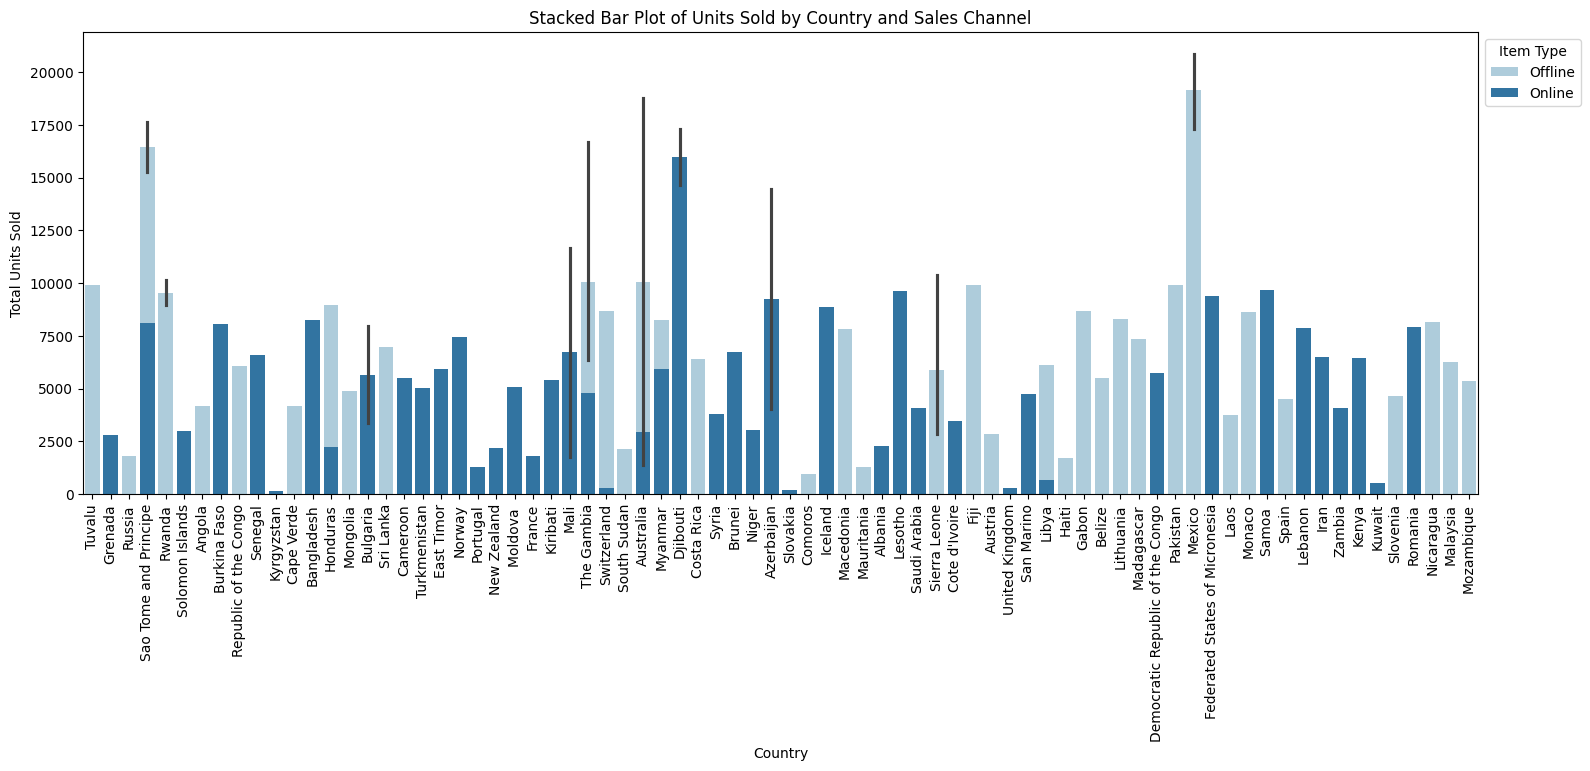

In [33]:
plt.figure(figsize=(18, 6))  
sns.barplot(data=df, x="Country", y="Units Sold", estimator=sum, hue="Sales Channel", dodge=False,palette="Paired")
plt.title("Stacked Bar Plot of Units Sold by Country and Sales Channel")
plt.xlabel("Country")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)  
plt.legend(title="Item Type", bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()


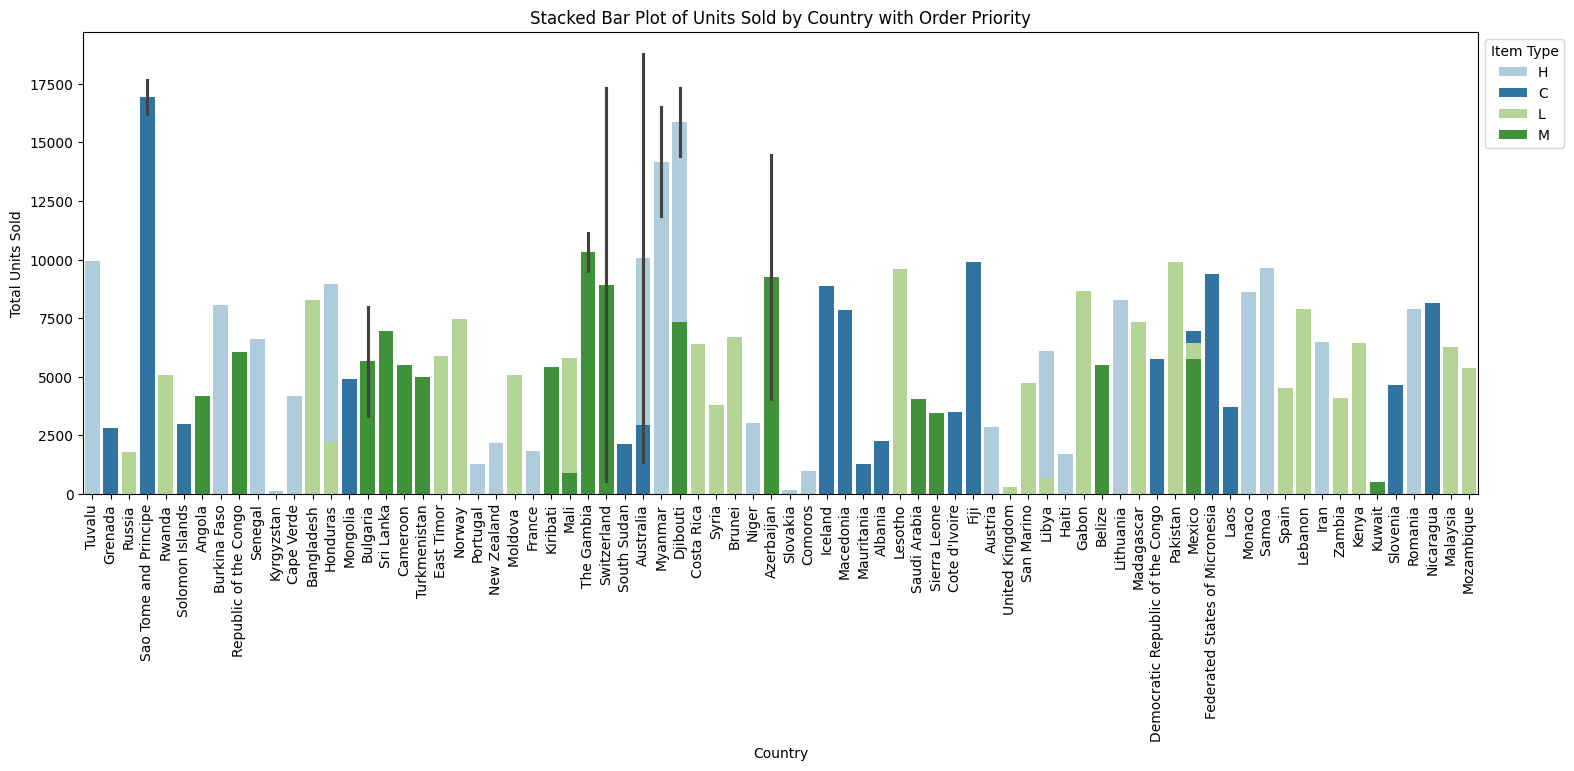

In [34]:
plt.figure(figsize=(18, 6))  
sns.barplot(data=df, x="Country", y="Units Sold", estimator=sum, hue="Order Priority", dodge=False,palette="Paired")
plt.title("Stacked Bar Plot of Units Sold by Country with Order Priority")
plt.xlabel("Country")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)  
plt.legend(title="Item Type", bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()


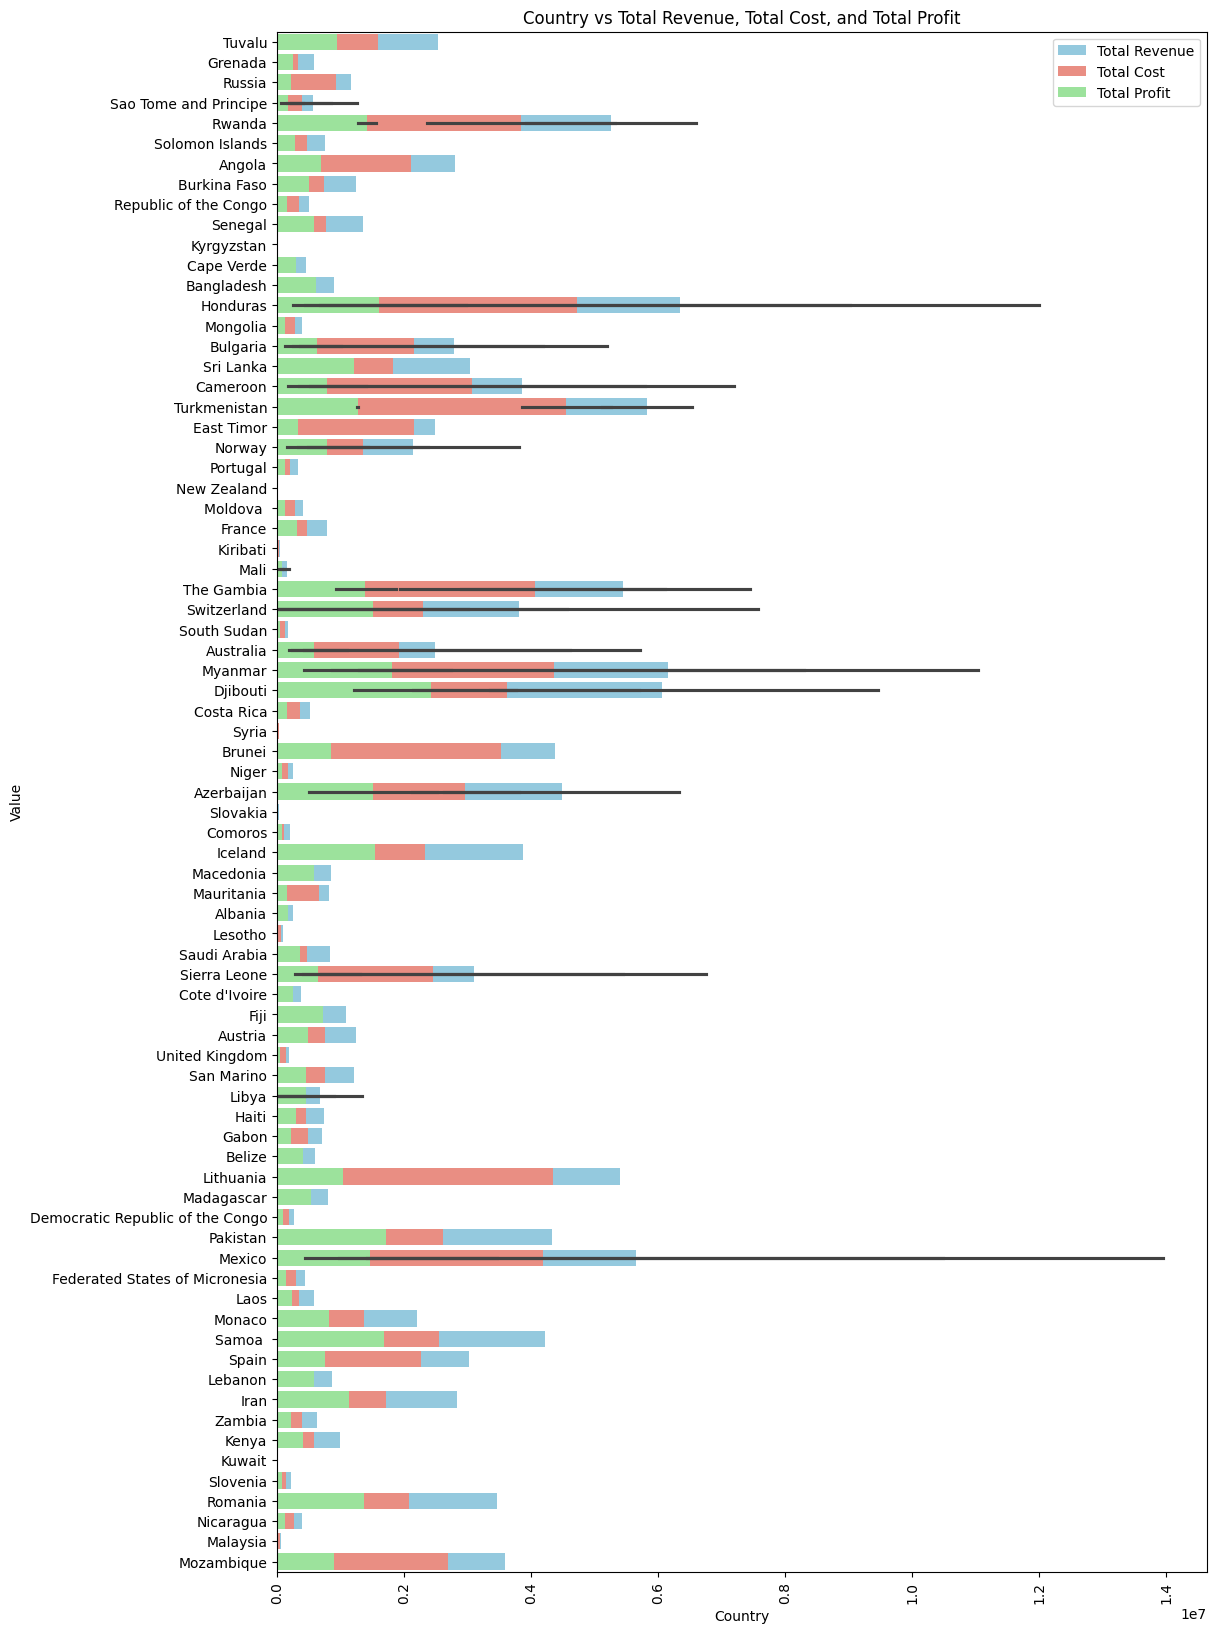

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains the necessary data with columns: 'Country', 'Total Revenue', 'Total Cost', and 'Total Profit'

plt.figure(figsize=(12, 20))
sns.barplot(data=df, y='Country', x='Total Revenue', color='skyblue', label='Total Revenue',estimator=sum)
sns.barplot(data=df, y='Country', x='Total Cost', color='salmon', label='Total Cost',estimator=sum)
sns.barplot(data=df, y='Country', x='Total Profit', color='lightgreen', label='Total Profit',estimator=sum)

plt.title('Country vs Total Revenue, Total Cost, and Total Profit')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.show()


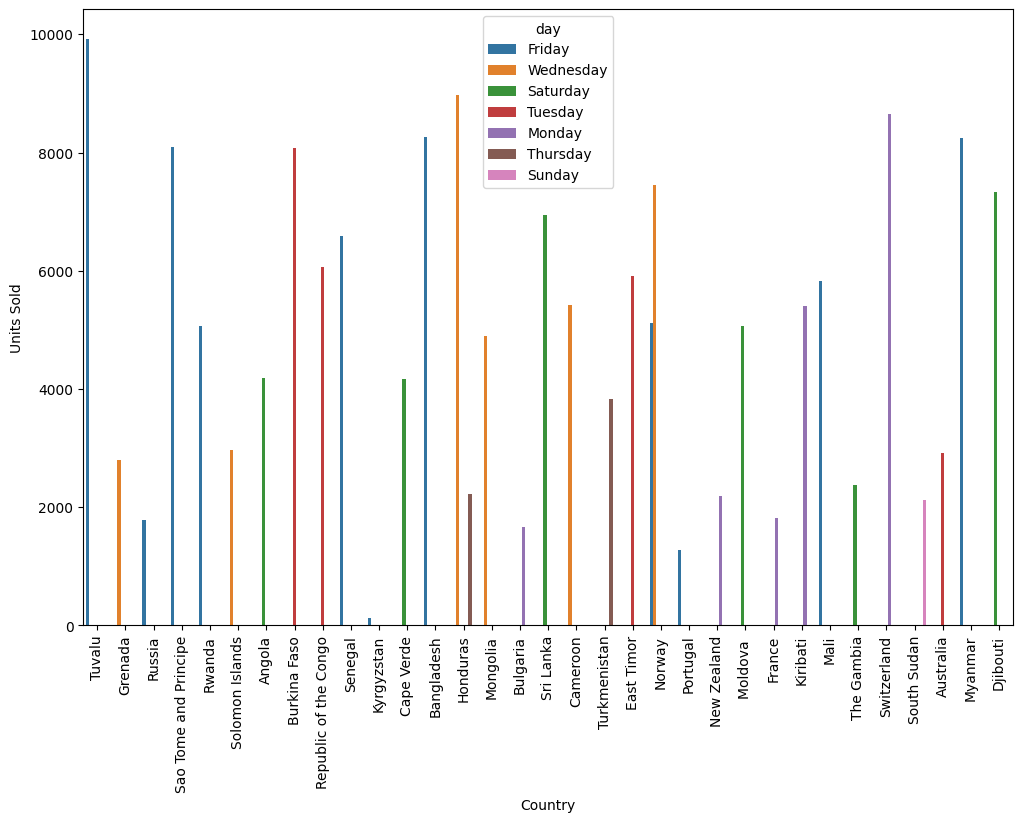

In [36]:
plt.figure(figsize=(12, 8))  
sns.barplot(data=df,y="Units Sold",x=df["Country"][:35],hue="day",estimator=sum)
plt.xticks(rotation=90)  
plt.show()

#### Item Type

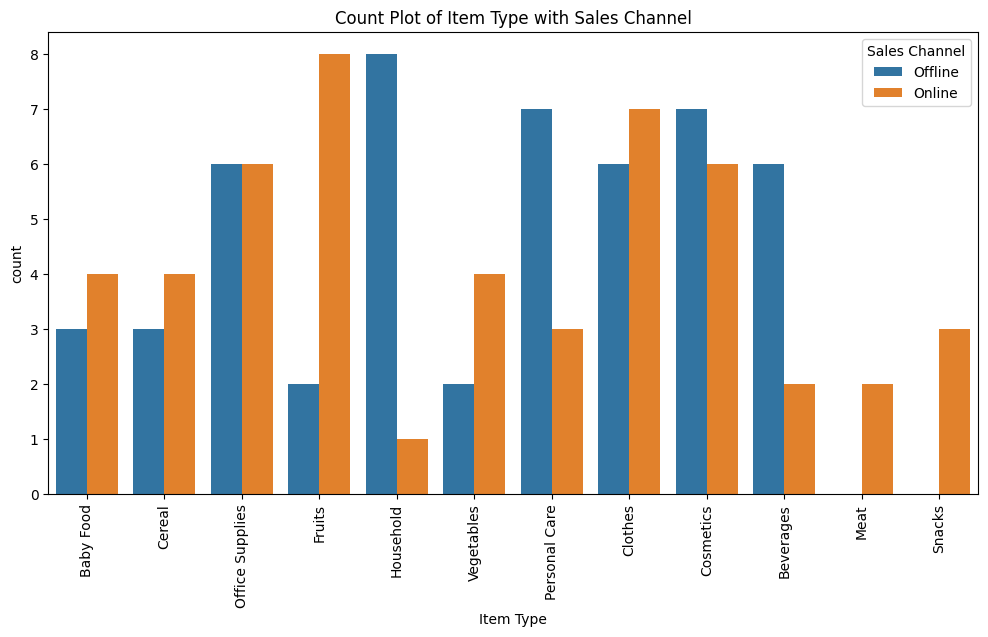

In [37]:
plt.figure(figsize=(12, 6))  
sns.countplot(data=df,x="Item Type",hue="Sales Channel")
plt.title("Count Plot of Item Type with Sales Channel")
plt.xlabel("Item Type")
plt.xticks(rotation=90)  
plt.show()

##### Insights
- Fruits, vegitables are Prefer to buy Online and meat, Snacks are alwalys buy online(As per our dataset).
- Household, Personal care, Cosmatics, Beverages are prefer to buy offline.

##### Item type by Order Priority

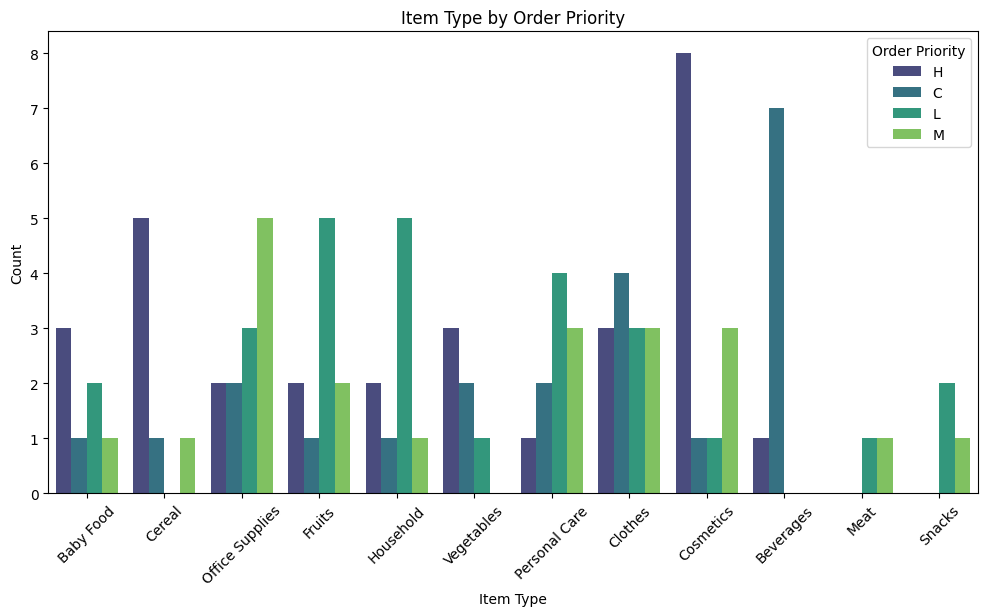

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Item Type', hue='Order Priority', palette='viridis')
plt.title('Item Type by Order Priority')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Order Priority')
plt.show()

##### Insights
- Baby food, Cereal and Cosmetics prefer to buy in high priority but personal Care and Beverage are not prefer to buy high priority.
- Beverage prefer to buy in C(I am not sure what it means) priority.
- Fruits, Household perfer to buy Low Priority.
- Offile Supplies perfer to buy Medium Priority.

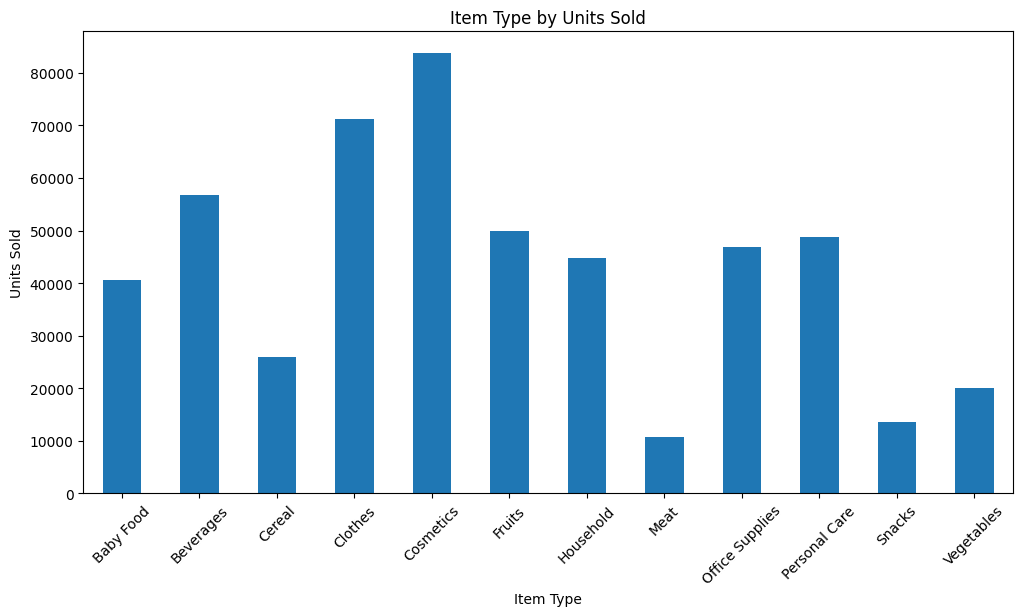

In [39]:
plt.figure(figsize=(12, 6))
df.groupby("Item Type")["Units Sold"].sum().plot(kind="bar")
plt.title('Item Type by Units Sold')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

##### Insights 
- The order of highest unit sales is: Cosmetics > Clothing > Beverages.

#####  "Profit Margin Analysis by Item Type"

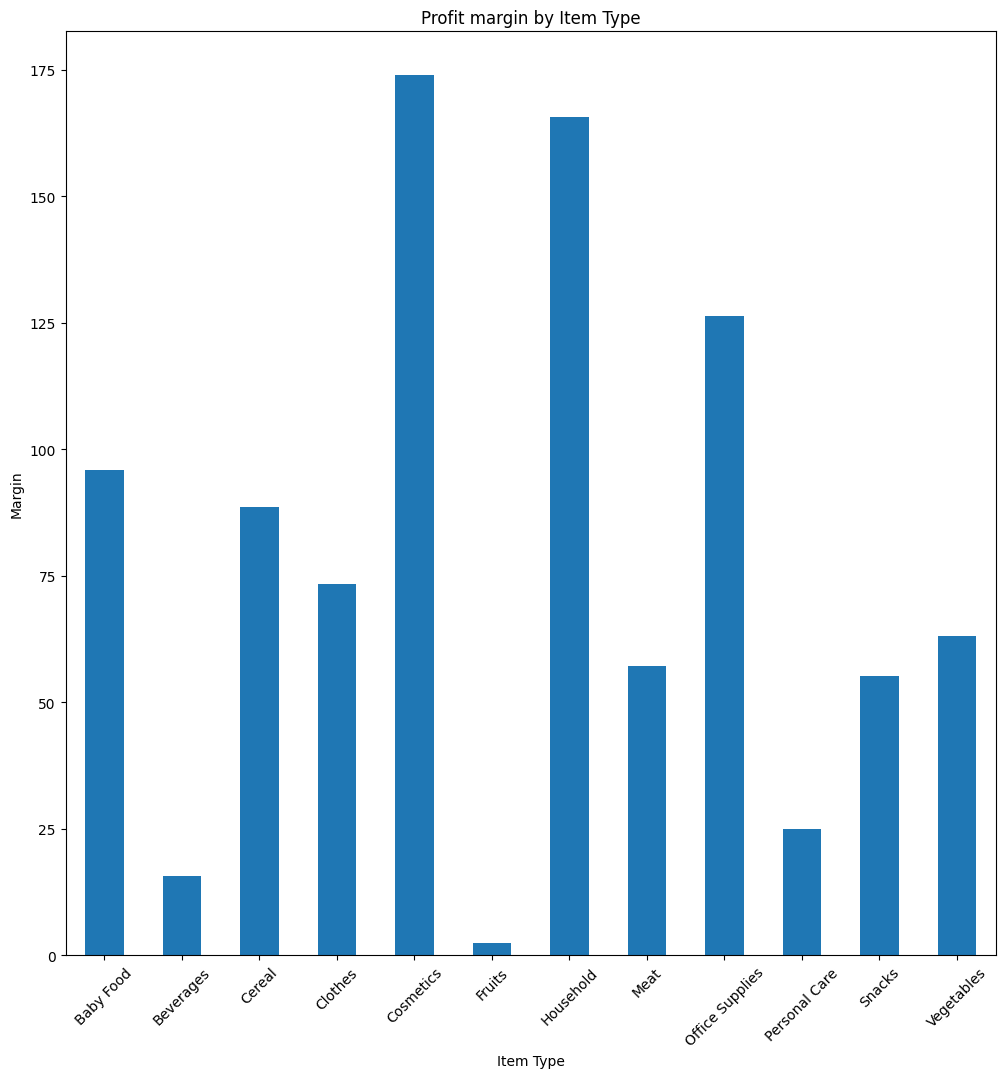

In [40]:
plt.figure(figsize=(12, 12))
per_unit=pd.DataFrame(df.groupby("Item Type")[["Unit Cost","Unit Price"]].mean())
per_unit["margin"]=per_unit['Unit Price']- per_unit['Unit Cost']
per_unit["margin"].plot(kind="bar")
plt.title('Profit margin by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Margin')
plt.xticks(rotation=45)
plt.show()


##### Insights
- Higher profit margin order 
       -- Cosmatics> Household>Office Supplies> Baby food

<Figure size 1200x1200 with 0 Axes>

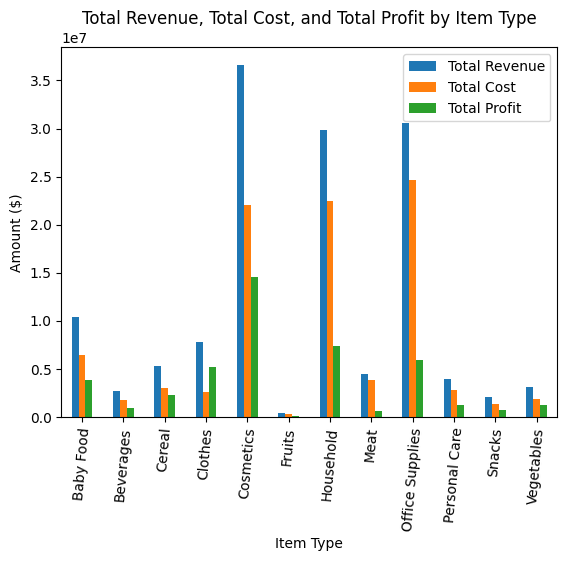

In [41]:
plt.figure(figsize=(12, 12))
df.groupby("Item Type")[['Total Revenue', 'Total Cost', 'Total Profit']].sum().plot(kind="bar")
plt.title('Total Revenue, Total Cost, and Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Amount ($)')
plt.xticks(rotation=85)
plt.show()



##### Insights
- as we can see the Cosmatics, Household, Office Supplies and Baby food are high revenue and Profit.
- In the Clothes Total Profit is more than total Cost, clothes has high unit sales than Household and office Supplies.


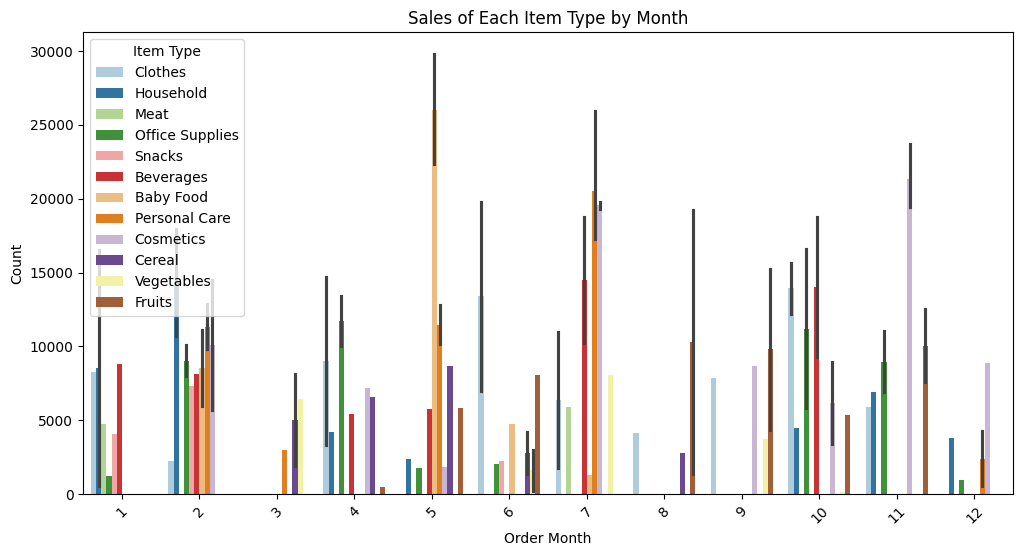

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Order_month',y="Units Sold", hue='Item Type',palette='Paired',estimator=sum)
plt.title('Sales of Each Item Type by Month')
plt.xlabel('Order Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Item Type', bbox_to_anchor=(0, 1), loc='upper left') 
plt.show()

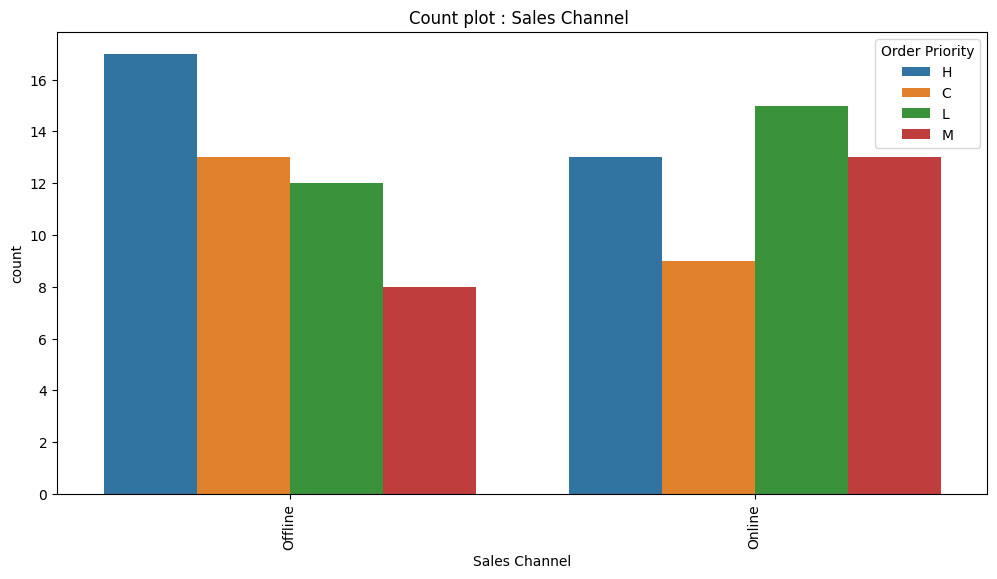

In [43]:
# df.groupby(["Sales Channel","Order Priority"])["Order ID"].count().plot(kind="bar")
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Sales Channel",  hue="Order Priority")
plt.title("Count plot : Sales Channel ")
plt.xticks(rotation=90)  
plt.show()

##### Sales Channel vs Units sold

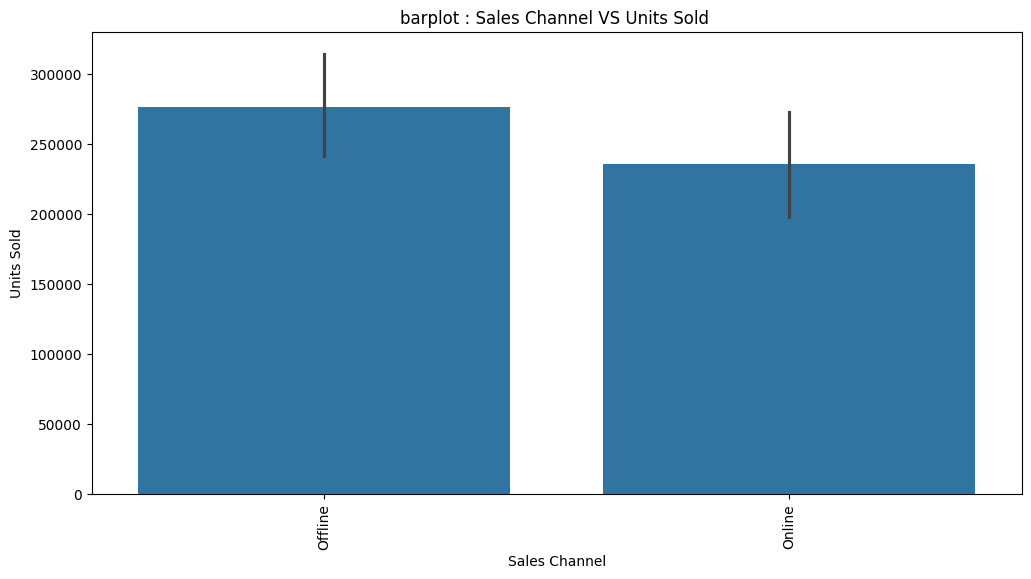

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Sales Channel", y="Units Sold", estimator=sum)
plt.title("barplot : Sales Channel VS Units Sold ")
plt.xticks(rotation=90)  
plt.show()

##### Insights
- It appears that offline units have a slightly higher sales volume.

##### Sales Channel vs Total Profit

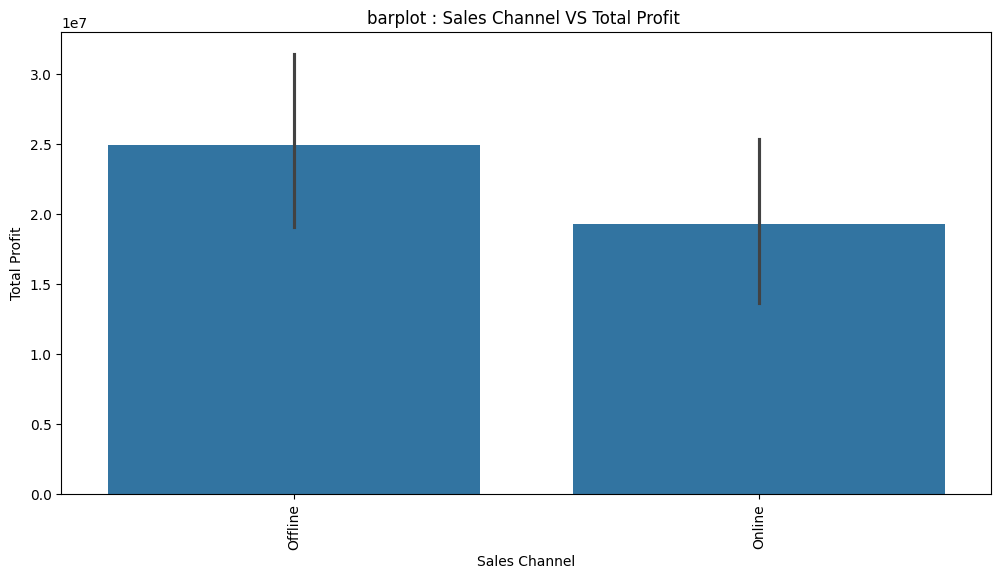

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Sales Channel", y="Total Profit", estimator=sum)
plt.title("barplot : Sales Channel VS Total Profit ")
plt.xticks(rotation=90)  
plt.show()

#### Order Priority by shipping days

In [46]:
# Calculate the difference in days between 'Ship Date' and 'Order Date'
df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group by 'Order Priority' and calculate the mean or median of 'Days to Ship'
mean_days_to_ship = df.groupby("Order Priority")['Days to Ship'].mean()
median_days_to_ship = df.groupby("Order Priority")['Days to Ship'].median()

print("Mean Days to Ship by Order Priority:")
print(mean_days_to_ship)

print("\nMedian Days to Ship by Order Priority:")
print(median_days_to_ship)


Mean Days to Ship by Order Priority:
Order Priority
C    23.863636
H    21.400000
L    23.592593
M    25.333333
Name: Days to Ship, dtype: float64

Median Days to Ship by Order Priority:
Order Priority
C    26.0
H    20.5
L    21.0
M    28.0
Name: Days to Ship, dtype: float64


##### Insights
- The mean days of item shipping for High priority orders is 21, for Medium priority it is 25, for Low priority it is 23, and for C priority it is 23.
- The median days of item shipping for High priority orders is 20.5, for Medium priority it is 28, for Low priority it is 21, and for C priority it is 26.

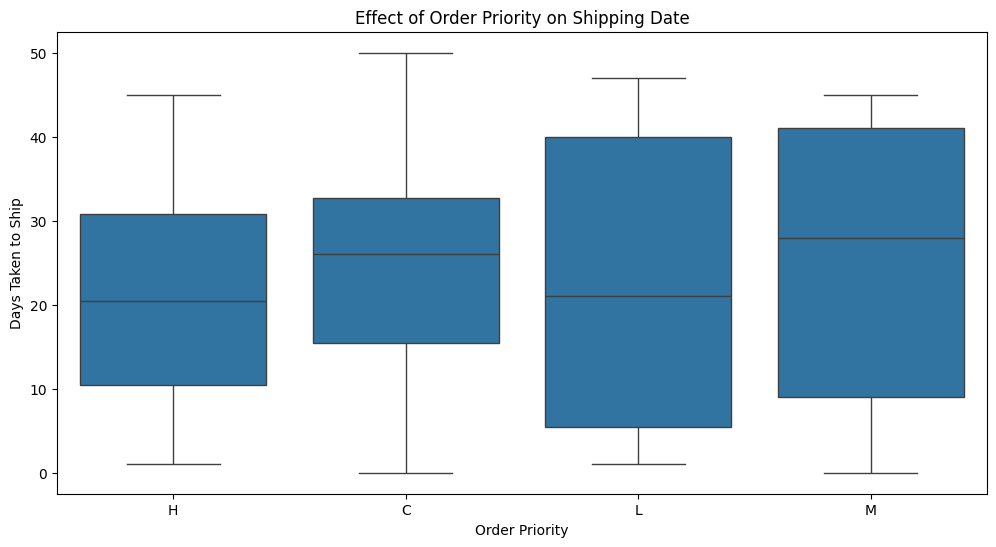

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Order Priority', y='Days to Ship')
plt.title('Effect of Order Priority on Shipping Date')
plt.xlabel('Order Priority')
plt.ylabel('Days Taken to Ship')
plt.show()

#### Mean Unit Price by Item Type and Order Priority

In [48]:
df.groupby(["Item Type","Order Priority"])['Unit Price'].mean()

Item Type        Order Priority
Baby Food        C                 255.28
                 H                 255.28
                 L                 255.28
                 M                 255.28
Beverages        C                  47.45
                 H                  47.45
Cereal           C                 205.70
                 H                 205.70
                 M                 205.70
Clothes          C                 109.28
                 H                 109.28
                 L                 109.28
                 M                 109.28
Cosmetics        C                 437.20
                 H                 437.20
                 L                 437.20
                 M                 437.20
Fruits           C                   9.33
                 H                   9.33
                 L                   9.33
                 M                   9.33
Household        C                 668.27
                 H                 668.27
  

#### Insights
- all item types, Unit price is remain constant over all order priority.

#### Pairplot

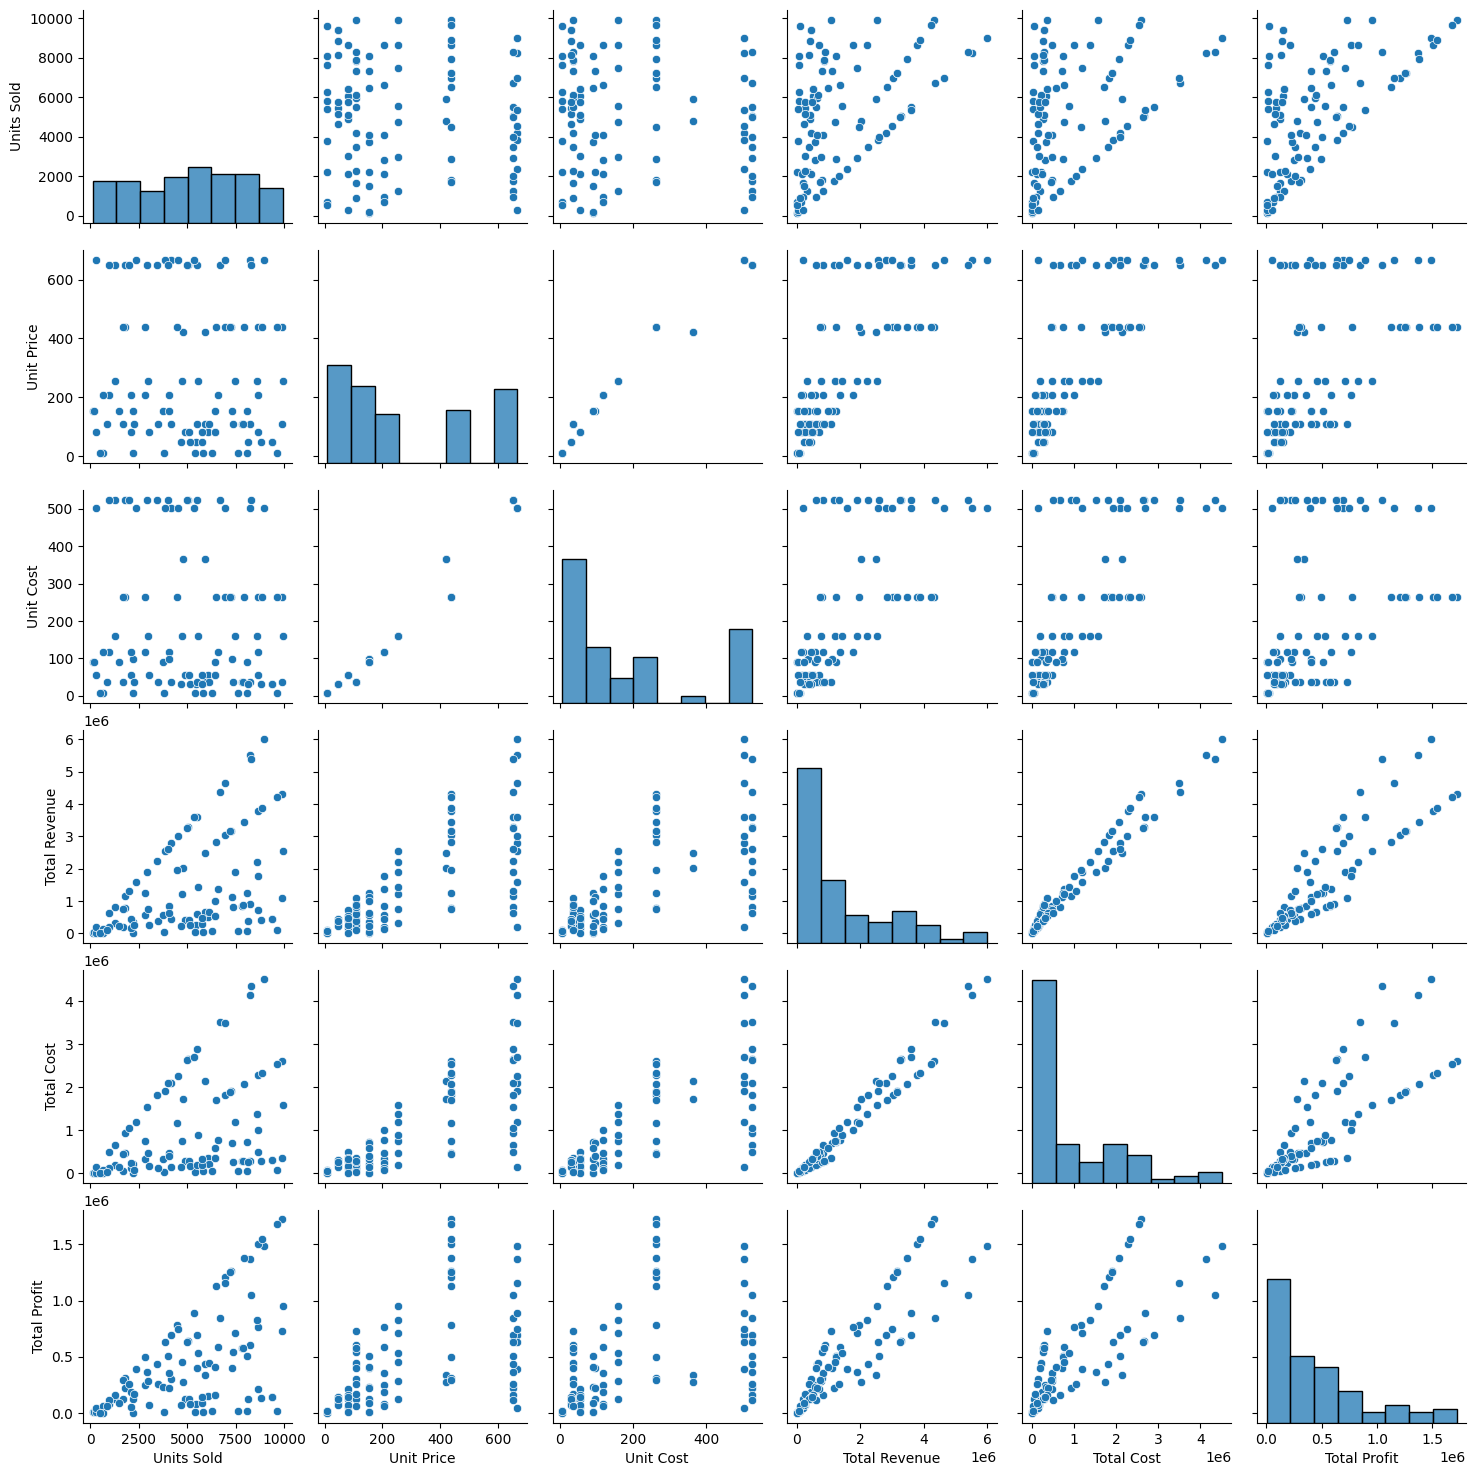

In [49]:
sns.pairplot(df.drop(['Order ID','Order_month', 'Order_Year', 'Days to Ship'],axis=1))

#### Heatmap

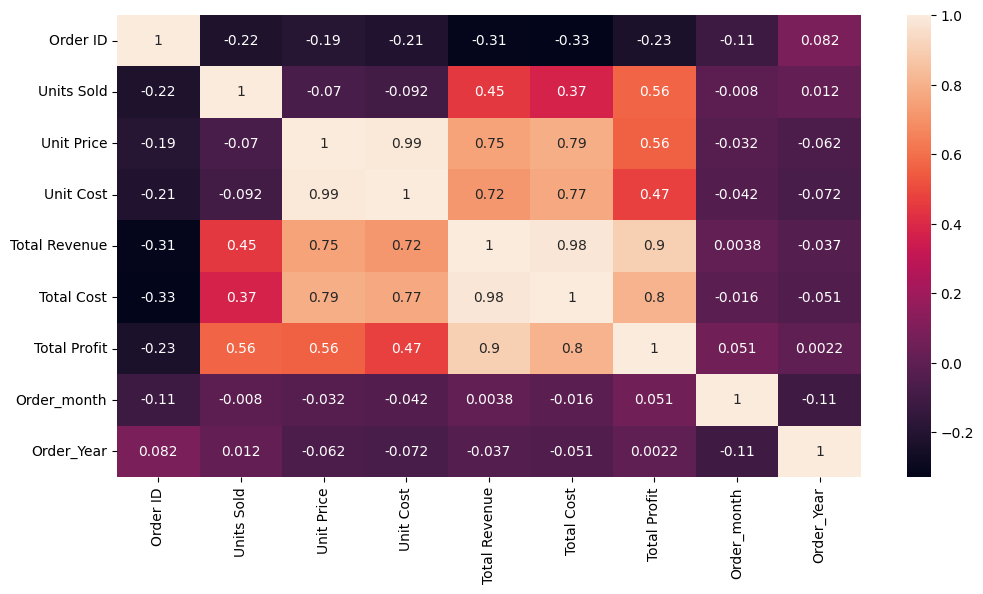

In [50]:
plt.figure(figsize=(12,6))
correlation_matrix = number_col.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [51]:
threshold = 0.7
highly_correlated_columns = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            column_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_columns[column_pair] = correlation_matrix.iloc[i, j]

print("Highly correlated column pairs and their correlation values:")
for column_pair, correlation_value in highly_correlated_columns.items():
    print(column_pair, correlation_value)


Highly correlated column pairs and their correlation values:
('Unit Price', 'Unit Cost') 0.9872698131268506
('Unit Price', 'Total Revenue') 0.7523596049915576
('Unit Price', 'Total Cost') 0.7879054270259372
('Unit Cost', 'Total Revenue') 0.7156226302489298
('Unit Cost', 'Total Cost') 0.7748952220758182
('Total Revenue', 'Total Cost') 0.9839276893258899
('Total Revenue', 'Total Profit') 0.89732686876336
('Total Cost', 'Total Profit') 0.8040910808150447


##### Insights 
- Highly correlated column pairs include 'Unit Price' and 'Unit Cost' (0.987), indicating a near-perfect linear relationship. Strong positive correlations are also observed between other pairs such as 'Total Revenue' and 'Total Cost' (0.984), 'Total Revenue' and 'Total Profit' (0.897), and 'Total Cost' and 'Total Profit' (0.804).

In [52]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'day',
       'Order_month', 'Order_Year', 'Order_Year_month', 'Days to Ship'],
      dtype='object')

### Monthly Sale Trend

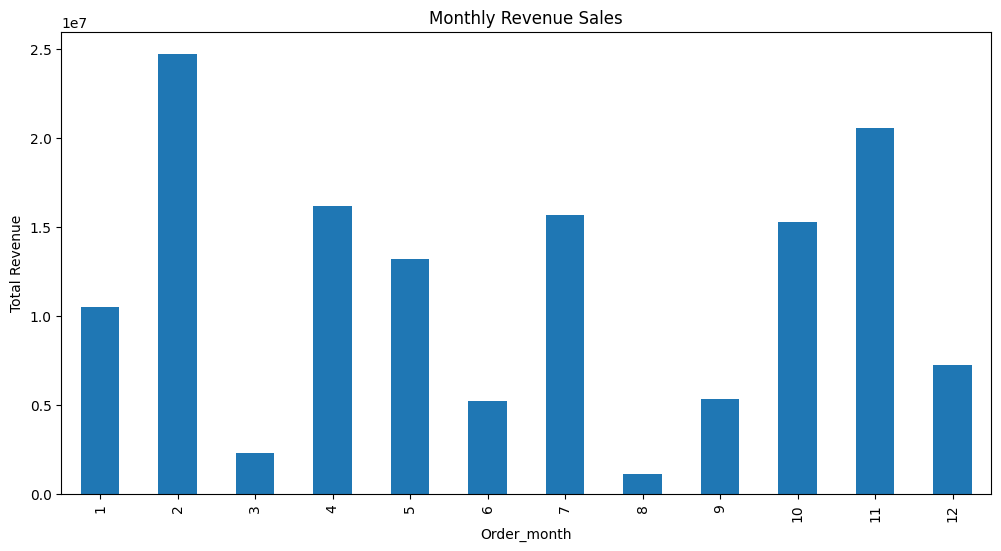

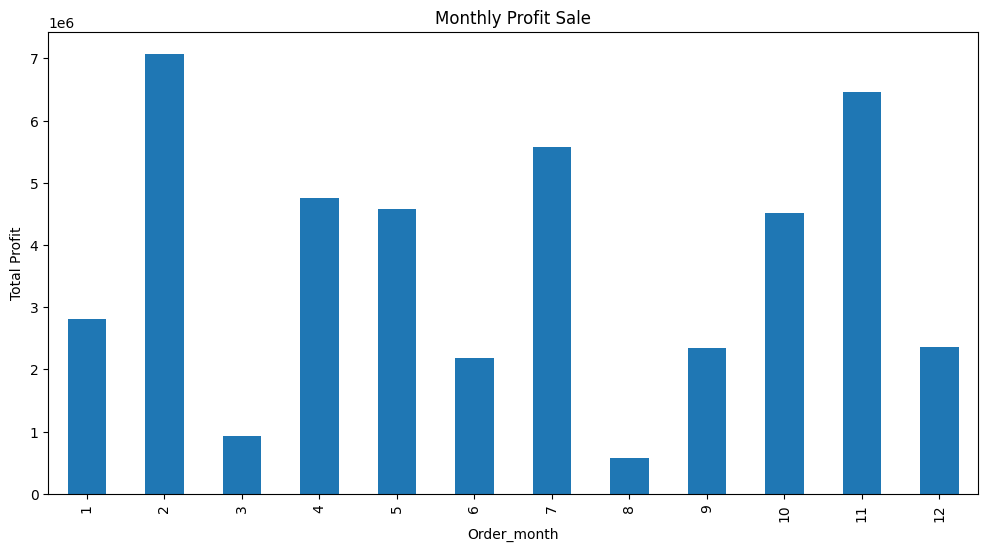

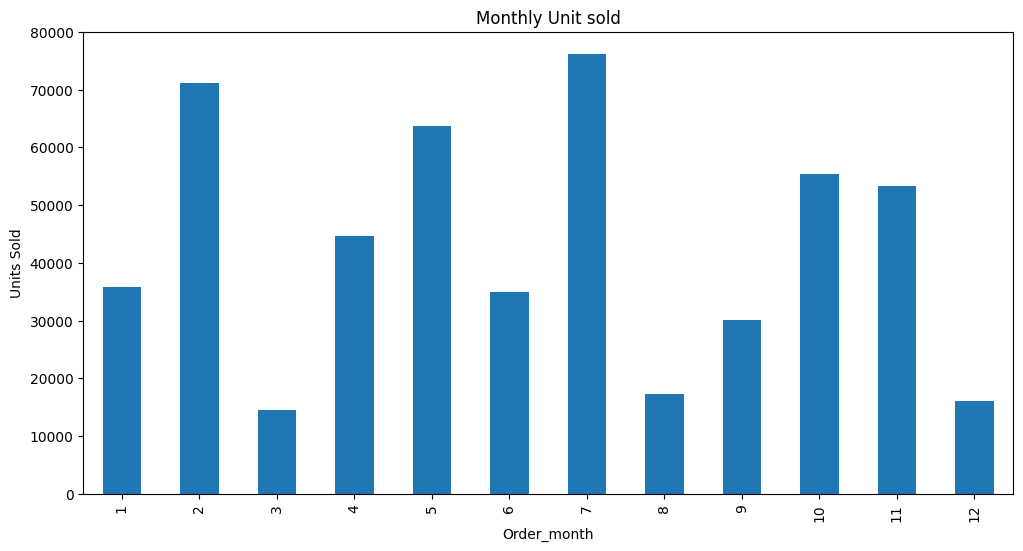

In [53]:
monthly_revenue_sales = df.groupby('Order_month')['Total Revenue'].sum()
monthly_unit_sold = df.groupby('Order_month')['Units Sold'].sum()
monthly_Profit_sales = df.groupby('Order_month')['Total Profit'].sum()

# Monthly revenue sales
monthly_revenue_sales.plot(kind='bar', figsize=(12, 6), title='Monthly Revenue Sales')
plt.xlabel('Order_month')
plt.ylabel('Total Revenue')
plt.show()

# Monthly Profit sales
monthly_Profit_sales.plot(kind='bar', figsize=(12, 6), title='Monthly Profit Sale')
plt.xlabel('Order_month')
plt.ylabel('Total Profit')
plt.show()

# Monthly Unit Sold
monthly_unit_sold.plot(kind='bar', figsize=(12, 6), title='Monthly Unit sold')
plt.xlabel('Order_month')
plt.ylabel('Units Sold')
plt.show()



### Insights

- Monthly sales trends reveal higher revenue and profit sales in the 2nd month, followed by the 11th month and then the 7th month.
- Unit sold trends indicate higher unit sales in the 7th month, followed by the 2nd month and then the 5th month.
- In the 11th month, high-priced units are predominantly sold, whereas in the 5th month, low-priced units are primarily sold.

### Yearly Sales trend

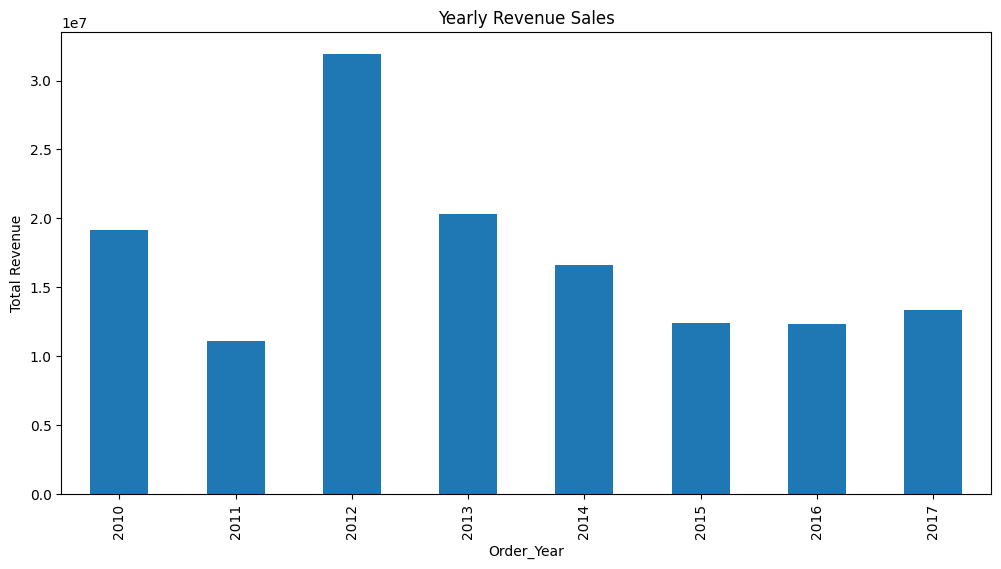

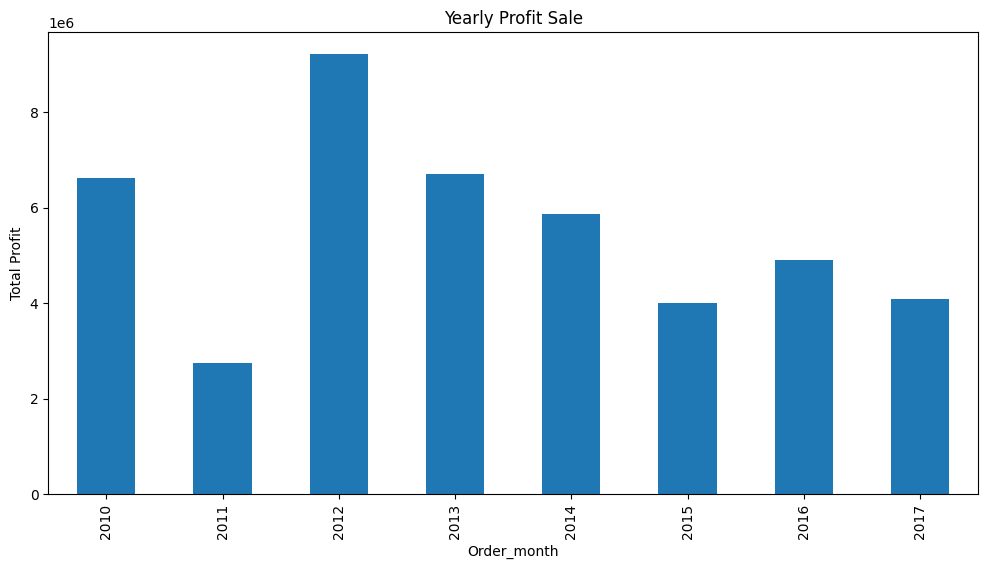

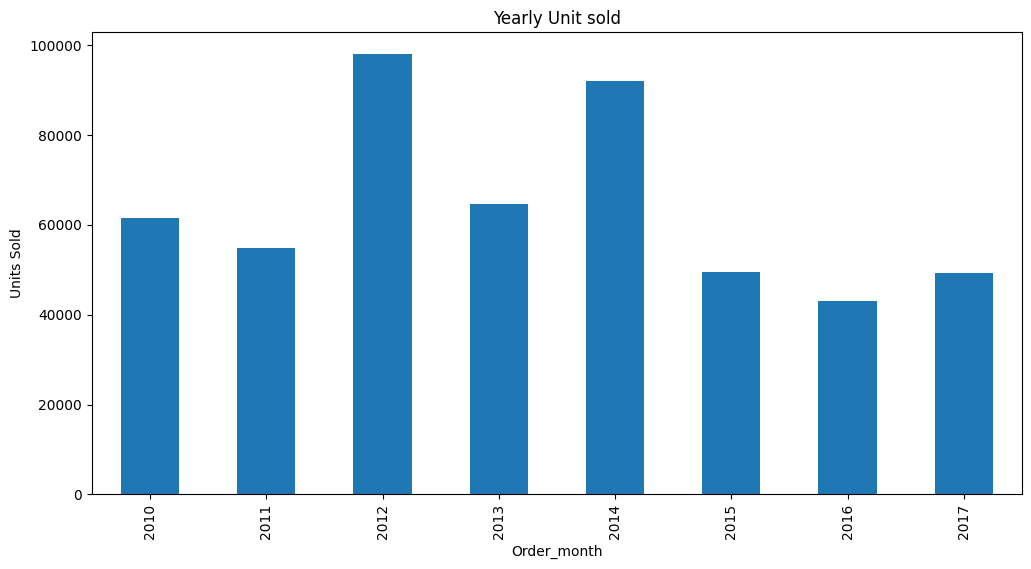

In [54]:
yearly_revenue_sales = df.groupby('Order_Year')['Total Revenue'].sum()
yearly_Profit_sales = df.groupby('Order_Year')['Total Profit'].sum()
yearly_units_sold = df.groupby('Order_Year')['Units Sold'].sum()


# Yearly Revenue sales
yearly_revenue_sales.plot(kind='bar', figsize=(12, 6), title='Yearly Revenue Sales')
plt.xlabel('Order_Year')
plt.ylabel('Total Revenue')
plt.show()

# Yearly Profit sales
yearly_Profit_sales.plot(kind='bar', figsize=(12, 6), title='Yearly Profit Sale')
plt.xlabel('Order_month')
plt.ylabel('Total Profit')
plt.show()

# Yearly Unit Sold
yearly_units_sold.plot(kind='bar', figsize=(12, 6), title='Yearly Unit sold')
plt.xlabel('Order_month')
plt.ylabel('Units Sold')
plt.show()

#### Insights 
- Yearly sales trends reveal higher revenue and profit sales in year 2012, followed by the 2013 and then the 2010 and low revenue and Profit in 2011 and 2015.
- Unit sold trends indicate higher unit sales in year 2012, followed by year 2014 and then the 2013 year.
- In the year 2011, low-priced units are predominantly sold.

### month Year Sale Trend

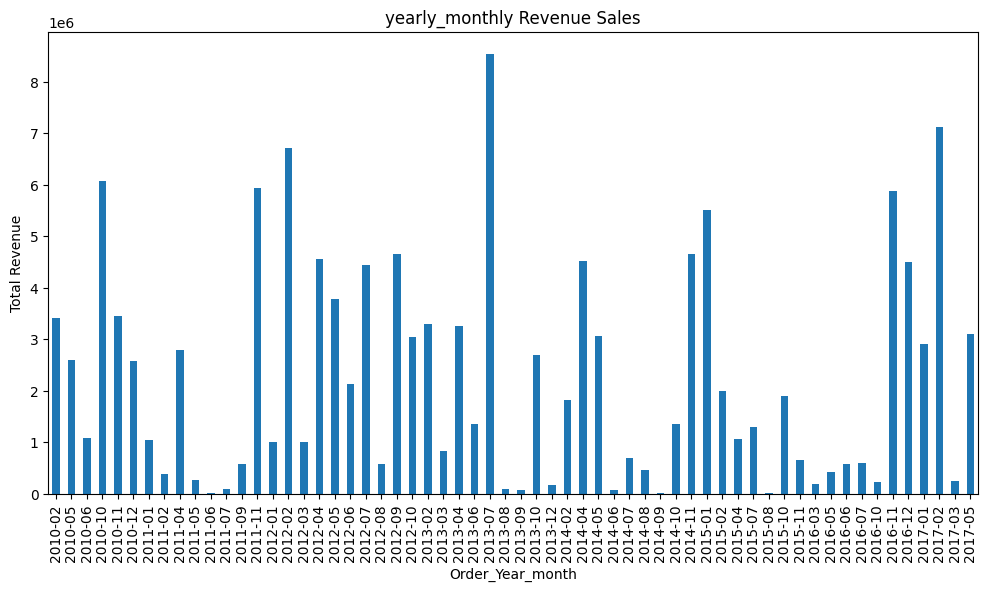

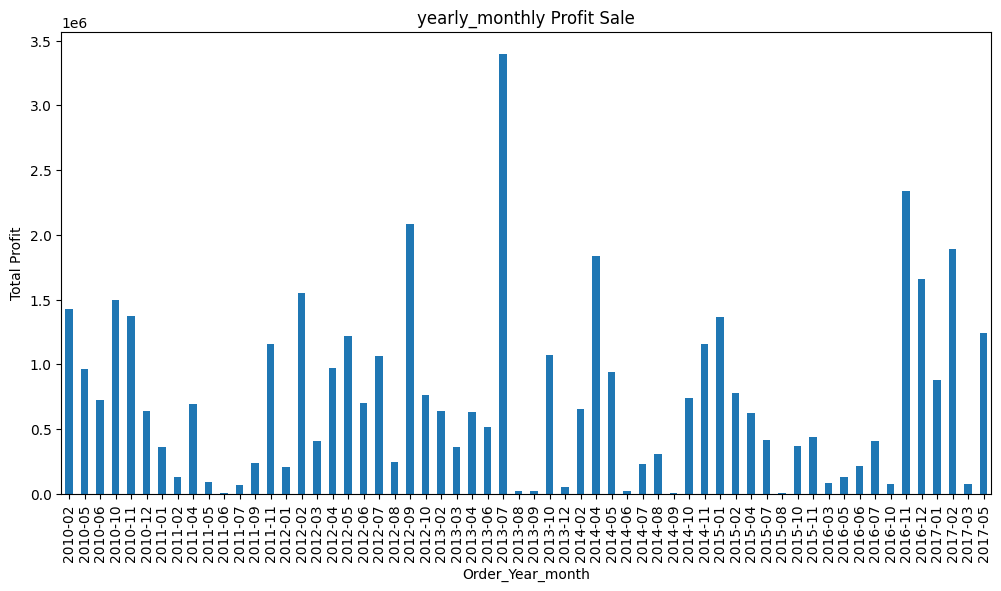

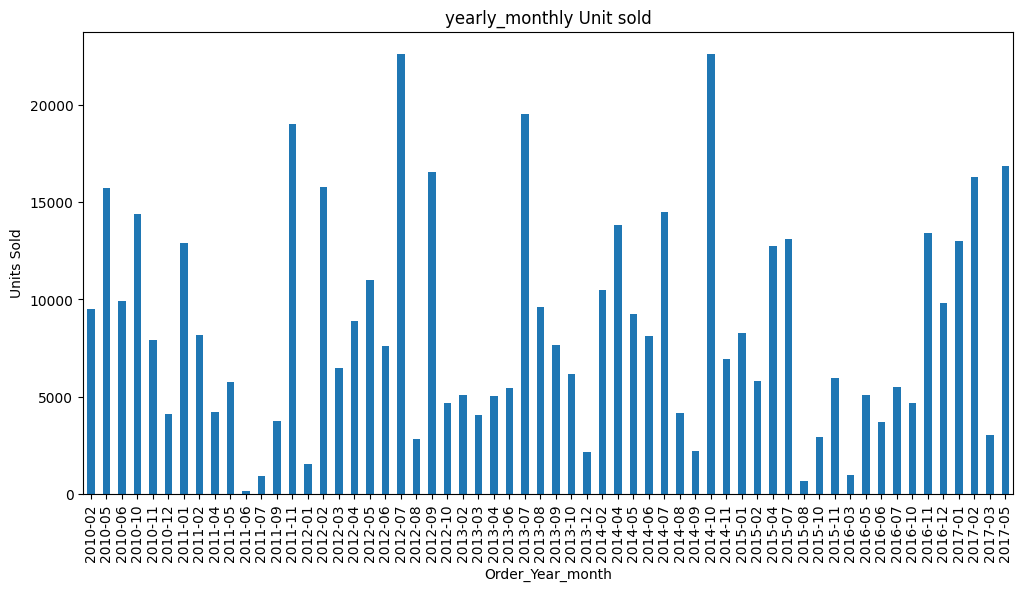

In [55]:
yearly_monthly_revenue_sales = df.groupby('Order_Year_month')['Total Revenue'].sum()
yearly_monthly_Profit_sales = df.groupby('Order_Year_month')['Total Profit'].sum()
yearly_monthly_units_sold = df.groupby('Order_Year_month')['Units Sold'].sum()


# yearly_monthly Revenue sales
yearly_monthly_revenue_sales.plot(kind='bar', figsize=(12, 6), title='yearly_monthly Revenue Sales')
plt.xlabel('Order_Year_month')
plt.ylabel('Total Revenue')
plt.show()

# yearly_monthly Profit sales
yearly_monthly_Profit_sales.plot(kind='bar', figsize=(12, 6), title='yearly_monthly Profit Sale')
plt.xlabel('Order_Year_month')
plt.ylabel('Total Profit')
plt.show()

# yearly_monthly Unit Sold
yearly_monthly_units_sold.plot(kind='bar', figsize=(12, 6), title='yearly_monthly Unit sold')
plt.xlabel('Order_Year_month')
plt.ylabel('Units Sold')
plt.show()

### Insights 
- Monthly Yearly sales trends revels that, in 2013-07 high revenue and Profit but unit sale is less than compared with 2014-10 and 2012-07.
- as in the 2014-10 and 2012-07 Unit Sales are high but revenue and profit is low.

## - Note: More visualizations and trends can be explored in Tableau for comprehensive analysis.

[Tableau Dashboard](https://public.tableau.com/app/profile/akash.patil7337/viz/AmazonSaledataAnalysis/Insights?publish=yes)
